# Greenbacks and Carbon Tracks: the Evolution of Economic Development and CO2 Emissions
# Project 1
## Introduction
Climate change and the effects of global warming are some of the greatest threats to the future existence of humanity. Throughout the 20th century, many scientists conducted research that indicated the potential adverse effects of climate change, including increased temperature, higher sea levels, and extreme weather phenomena. The main force driving global warming is the production of Greenhouse Gases (GHG) like Carbon Dioxide (CO2), which, when released into the atmosphere, absorbs infrared radiation, increasing the planet's temperature. Human activity, like the production and use of coal, natural gas, and oil, has caused an increase in the total amount of CO2 in the atmosphere by 50% since the start of the industrial revolution 250 years ago. Even though there is overwhelming evidence to support the catastrophic effects of global warming, by the turn of the century, only 10% of countries had policies to reduce their GHG emissions, believing that reducing CO2 emissions could only come at the cost of their economy. This paper examines those claims on a country level, analyzing the relationship between CO2 emissions and economic development. 

This topic has been researched extensively over the past 30 years, piquing the interest of economists and policymakers alike. Prior to the 2000s, researchers primarily focused on the theorical relationship between emissions and development, with the EKC hypothesis emerging as the dominant theory. The EKC hypothesis states emissions "exhibit inverted-U or 'Kuznets,' relationship with economic development," where the inverted-U shape refers to levels of emissions increasing with development as a country industrializes. However, once a country meets a certain development threshold, elevated income levels, better education systems, and increased societal openness among other factors will increase demand for environmental quality; resulting in reduced emissions in the long run (Selden and Song 1994). There are countless papers from this time with evidence both for and against the EKC hypothesis, with no clear consensus in the field. As the effects of climate change became clearer, researchers pivoted to focus on the causal relationship between emissions and development, putting a large emphasis on energy consumption. Antonakakis et al. (2017) state that the trade-off between CO2 emissions and economic growth is an 'ethical dilemma,' finding a lack of evidence to support that renewable energy is conducive to economic growth. They found that countries with high CO2 emissions correlate with high levels of economic development, historically and today. The authors suggest a 'change in mindset' to promote a-growth or degrowth to protect the environment, as renewable energy may not be feasible in the long run. Singh et al. (2019) yield contrary results, stating policies that incentivize investment in renewable energy technologies are conducive to economic growth, emphasizing additional benefits from the creation of green jobs and construction of renewable energy infrastructure. Authors warn that countries must carefully consider what policies to enact, as country factors can significantly impact their effectiveness. They also find that economic growth from renewable energy investments is higher in developing countries. Their results agree with Marques and Fuinhas (2012), who add that renewable energy technologies are becoming increasingly reliable and sustainable as more countries invest in them. Chiu and Chang (2009) agree that renewable technologies reduce emissions, but estimate that renewable energy must provide a minimum of 8.39% of a country's total power generation to start to mitigate emissions. Their results support the EKC hypothesis suggesting a threshold for countries to meet before being able to reduce emissions. Finally, Jaforullah and King (2015) note that using renewable energy reduces CO2 emissions and the demand for fossil fuels, causing lower prices and making it challenging for developing countries to justify investments in expensive renewable energy technology. The varied results stem from each study covering different regions and periods, a lack of consistency in what variables are considered, how variables are defined, and omitted variable bias due to the immensely complex relationship between CO2 emissions and economic development.

Using CO2 emission data from 1990 to 2021, combined with various indicators of economic development, I find that increases economic development are positively correlated with CO2 emissions, revealing a dependence on fossil fuels to improve economic development. The following datasets were used in this analysis; Emission by Country (The Global Carbon Project, 1750-2022), Human Development Index (United Nations Development Program, 1990-2021), GDP per capita, 2017 international $ (The World Bank, 1990-2022), Energy Intensity (Our World In Data, 1965-2018), and Country Policies with GHG Reduction Target (Climate Policy Database, 1991-2023). 

### Variables
My dependent variable is CO2 emissions per capita measured in metric tons of CO2. CO2 is the most common GHG produced by burning fossil fuels like coal, natural gas, and oil. For the past 200 years, we have relied almost exclusively on the burning of these resources to power our vehicles, cities, and industries. Our reliance on them makes it challenging to reduce CO2 emissions, as the world would cease to function if we ran out overnight. As countries embraced industrialization, their economy and CO2 emissions grew at unprecedented rates, making the challenge of our century to decouple their simultaneous growth. 

The first independent variable is the Human Development Index (HDI), which will be this paper's primary measure of economic development. This composite index has multiple components falling under three general categories: quality of life, education access, and living standard. Some variables used in this index are gross national income (GNI), average years of education, and life expectancy. Using this index as the primary measure of economic development captures countries' economic well-being and the population's quality of life. Comparing CO2 emissions to the HDI allows us to capture the adverse effects on economic development's social and monetary aspects.

Next is energy intensity measured in kilowatt-hours per dollar, which measures how efficient an economy is. Energy intensity is calculated by the amount of energy (measured in kilowatt-hours) it takes to produce one unit of economic output (measured by GDP). Energy consumption is the most important variable connecting CO2 emissions to economic development (Singh et al., 2019) (Antonakakis et al., 2017). While economists have not been able to agree on the causal relationship between emissions, economic development, and energy consumption, it is unanimous across the literature that they are correlated. Since CO2 emissions result from our societal need for power, energy intensity gives us essential insights into the production of CO2 emissions. Additionally, while moving to renewable energy sources like solar and wind power is best for the environment in the long run, improving the efficiency of burning fossil fuels is a short-run solution many countries have used to reduce their emissions.  

The next variable is Gross domestic product (GDP) per capita, measured in 2017 international dollars. While this paper will focus on many aspects of economic development, GDP is one of our best ways of measuring economic growth. The GDP measures the value of all goods produced by an economy in a given year. GDP measures how an economy evolves and grows from year to year. Comparing GDP per capita to CO2 emissions allows us to determine how policies designed to reduce the effects of climate change impact the economy. 

The final independent variable is a dummy variable indicating if a country has implemented a policy with greenhouse gas emission reduction targets. This variable was created using the Climate Policy Database (1991-2023), which lists all climate-related policies, laws, and mandates ratified by any nation or supranational government body like the European Union. The subset of policies used in this analysis is all policies that have GHG reduction targets. This dataset gives insights into what countries are trying to reduce or limit their emissions. This dummy variable allows us to see if government policies designed to reduce GHG emissions are effective and if there is any correlation with economic development. See references for database citations.

## Data Cleaning/Loading

In [4]:
# Import Python libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings("ignore")

#Load raw data
emissions = pd.read_csv("co2_emissions.csv")
gdp = pd.read_csv("world_bank_gdppc_ppp.csv", skiprows=4) #skiprows to remove summary rows
hdi = pd.read_csv("undp_hdi.csv", usecols=range(37)) #usecols to remove hdi component columns
energy = pd.read_csv("energy-intensity.csv")
policies = pd.read_csv("climate_policies.csv")

# Rename and drop irrelavent columns
emissions['ISO'] = emissions['ISO 3166-1 alpha-3']
gdp['ISO'] = gdp['Country Code']
hdi['ISO'] = hdi['iso3']
emissions = emissions.drop(columns=['ISO 3166-1 alpha-3'])
gdp = gdp.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
hdi = hdi.drop(columns=['iso3', 'region', 'hdicode', 'hdi_rank_2021'])
energy.rename(columns={'Code': 'ISO'}, inplace=True)
energy.rename(columns={'Primary energy consumption per GDP (kWh/$)': 'Energy Intensity'}, inplace=True)
policies = policies[['country_iso', 'country', 'decision_date']]
hdi.columns = hdi.columns.str.replace('hdi_', '') #Remove 'hdi_' from column names

#Create row with country and year as index for datasets to be merged
gdp = gdp.melt(id_vars=['Country Name', 'ISO'], var_name='Year', value_name='GDP')
hdi = hdi.melt(id_vars=['country', 'ISO'], var_name='Year', value_name='HDI')

#Clean melted dataframes
gdp = gdp[gdp.Year != 'Unnamed: 65']
gdp = gdp[gdp.Year != 'Unnamed: 67']

# Merge dataframes with emissions
emissions['Year'] = emissions['Year'].astype(int)
gdp['Year'] = gdp['Year'].astype(int)
hdi['Year'] = hdi['Year'].astype(int)
energy['Year'] = energy['Year'].astype(int)
emissions_gdp = pd.merge(emissions, gdp, left_on=['ISO', 'Year'], right_on=['ISO', 'Year'])
emissions_gdp_hdi = pd.merge(emissions_gdp, hdi, left_on=['ISO', 'Year'], right_on=['ISO', 'Year'])
emissions_gdp_hdi_energy = pd.merge(emissions_gdp_hdi, energy, left_on=['ISO', 'Year'], right_on=['ISO', 'Year'], how='left')

# Remove duplicate columns
emissions_gdp_hdi_energy.drop(columns=['Country Name', 'country', 'Entity'], inplace=True)

# Remove sector breakdown columns and rename columns
emissions_gdp_hdi_energy.drop(columns=['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other'], inplace=True)
emissions_gdp_hdi_energy = emissions_gdp_hdi_energy.rename(columns={'Total': 'Total CO2', 'Per Capita': 'CO2 Per Capita', 'GDP': 'GDP Per Capita'})

# Create Europeon Union dataset
eu = pd.DataFrame({'country': ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
                              'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
                              'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal',
                               'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'],
                   'ISO': ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN',
                            'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE'], 
                   'Join Year': [1995, 1957, 2007, 2013, 2004, 2004, 1973, 2004, 1995, 1957, 1957, 1981, 2004, 1973, 1957, 2004,
                                  2004, 1957, 2004, 1958, 2004, 1986, 2007, 2004, 2004, 1986, 1995]})

# Create a dummy variable that indicates if a country is in the European Union for each year
emissions_gdp_hdi_energy = pd.merge(emissions_gdp_hdi_energy, eu, left_on='ISO', right_on='ISO', how='left')
emissions_gdp_hdi_energy['EU Member'] = np.where(emissions_gdp_hdi_energy['Year'] >= emissions_gdp_hdi_energy['Join Year'], 1, 0)
emissions_gdp_hdi_energy.drop(columns=['Join Year', 'country'], inplace=True)

# Create a secondary ISO code equal to 'EUE' in rows where EU Member is 1
emissions_gdp_hdi_energy['ISO_2'] = np.where(emissions_gdp_hdi_energy['EU Member'] == 1, 'EUE', np.nan)

# Merge policies dataset with emissions_gdp_hdi_energy dataset
emissions_gdp_hdi_energy_policy = pd.merge(emissions_gdp_hdi_energy, policies, left_on=['ISO', 'Year'],
                                           right_on=['country_iso', 'decision_date'], how='left')

# Create a dummy variable that indicates if a country had a climate policy ratified for each year
emissions_gdp_hdi_energy_policy['GHG Policy Ratified'] = np.where(emissions_gdp_hdi_energy_policy['country_iso'].notnull(), 1, 0)
emissions_gdp_hdi_energy_policy.drop(columns=['EU Member', 'country_iso', 'country', 'decision_date'], inplace=True)

# Repeat for EU countries
emissions_gdp_hdi_energy_policy = pd.merge(emissions_gdp_hdi_energy_policy, policies, left_on=['ISO_2', 'Year'],
                                     right_on=['country_iso', 'decision_date'], how='left')

# Set Policy to 1 for EU countries with decision_date
emissions_gdp_hdi_energy_policy['GHG Policy Ratified'] = np.where(emissions_gdp_hdi_energy_policy['country_iso'].notnull(), 1, emissions_gdp_hdi_energy_policy['GHG Policy Ratified'])
emissions_gdp_hdi_energy_policy.drop(columns=['country_iso', 'ISO_2', 'country', 'decision_date'], inplace=True)

# Remove duplicate rows
emissions_gdp_hdi_energy_policy = emissions_gdp_hdi_energy_policy.drop_duplicates()

# Set GRG policy ratified to 1 for any year after a ratified a policy 
emissions_gdp_hdi_energy_policy['GHG Policy Ratified'] = emissions_gdp_hdi_energy_policy.groupby('Country')['GHG Policy Ratified'].cummax()

#Create Temporary variables for HDI classifaction
emissions_gdp_hdi_energy_policy['Very High'] = 0
emissions_gdp_hdi_energy_policy['High'] = 0
emissions_gdp_hdi_energy_policy['Medium'] = 0
emissions_gdp_hdi_energy_policy['Low'] = 0

#Fill temporary variables with 1 if HDI is in the specified range
emissions_gdp_hdi_energy_policy['Very High'] = np.where(emissions_gdp_hdi_energy_policy['HDI'] > 0.8, 1, 0)
emissions_gdp_hdi_energy_policy['High'] = np.where((emissions_gdp_hdi_energy_policy['HDI'] <= 0.8) & (emissions_gdp_hdi_energy_policy['HDI'] > 0.7), 1, 0)  
emissions_gdp_hdi_energy_policy['Medium'] = np.where((emissions_gdp_hdi_energy_policy['HDI'] <= 0.7) & (emissions_gdp_hdi_energy_policy['HDI'] > 0.55), 1, 0)
emissions_gdp_hdi_energy_policy['Low'] = np.where(emissions_gdp_hdi_energy_policy['HDI'] <= 0.55, 1, 0)

#Create a new column that contains the HDI category for each country
emissions_gdp_hdi_energy_policy['HDI Category'] = 0
emissions_gdp_hdi_energy_policy['HDI Category'] = np.where(emissions_gdp_hdi_energy_policy['Very High'] == 1, 3, emissions_gdp_hdi_energy_policy['HDI Category'])
emissions_gdp_hdi_energy_policy['HDI Category'] = np.where(emissions_gdp_hdi_energy_policy['High'] == 1, 2, emissions_gdp_hdi_energy_policy['HDI Category'])
emissions_gdp_hdi_energy_policy['HDI Category'] = np.where(emissions_gdp_hdi_energy_policy['Medium'] == 1, 1, emissions_gdp_hdi_energy_policy['HDI Category'])
emissions_gdp_hdi_energy_policy['HDI Category'] = np.where(emissions_gdp_hdi_energy_policy['Low'] == 1, 0, emissions_gdp_hdi_energy_policy['HDI Category'])

#Remove temporary variables
emissions_gdp_hdi_energy_policy = emissions_gdp_hdi_energy_policy.drop(columns=['Very High', 'High', 'Medium', 'Low'])

# Save cleaned data
emissions_gdp_hdi_energy_policy = emissions_gdp_hdi_energy_policy[['Country', 'ISO', 'Year', 'Total CO2', 'CO2 Per Capita', 'GDP Per Capita', 'HDI', 'HDI Category', 'Energy Intensity', 'GHG Policy Ratified']]

emissions_gdp_hdi_energy_policy.head()

,Country,ISO,Year,Total CO2,CO2 Per Capita,GDP Per Capita,HDI,HDI Category,Energy Intensity,GHG Policy Ratified
0,Afghanistan,AFG,1990,2.024326,0.189281,NaN,0.273,0,2.429634,0
1,Afghanistan,AFG,1991,1.914301,0.178155,NaN,0.279,0,1.154009,0
2,Afghanistan,AFG,1992,1.482054,0.122916,NaN,0.287,0,0.723151,0
3,Afghanistan,AFG,1993,1.486943,0.106182,NaN,0.297,0,0.925850,0
4,Afghanistan,AFG,1994,1.453829,0.094065,NaN,0.292,0,1.113139,0


In [5]:
# Function that creates a list of all countries with missing data in a specified column
def missing_data(df, column) -> list:
    """Return a list of countries with missing data in the specified column"""
    missing = df[df[column].isnull()]['Country'].unique()
    return missing

# Create subset of data with no observations past 2017
e2017 = emissions_gdp_hdi_energy_policy[emissions_gdp_hdi_energy_policy['Year'] <= 2017]

# Number of Obersevations before data cleaning
before = emissions_gdp_hdi_energy_policy['GDP Per Capita'].count()

# Create lists of countries with missing data
m_gdp = missing_data(emissions_gdp_hdi_energy_policy, 'GDP Per Capita')
m_hdi = missing_data(emissions_gdp_hdi_energy_policy, 'HDI')
m_energy = missing_data(e2017, 'Energy Intensity')

# Merge lists of countries with missing data into one list with no duplicates
missing = list(set(m_gdp) | set(m_hdi) | set(m_energy))

# Fuction that removes all observations with specified country name
def remove_country(df, country) -> pd.DataFrame:
    """Return a dataframe with all observations for the specified country removed"""
    df = df[df['Country'] != country]
    return df   

# Remove countries with missing data
for country in missing:
    emissions_gdp_hdi_energy_policy = remove_country(emissions_gdp_hdi_energy_policy, country)

# Number of Obersevations after data cleaning
after = emissions_gdp_hdi_energy_policy['GDP Per Capita'].count()

# Create a new variable for clean called ID that is the ISO code and year
emissions_gdp_hdi_energy_policy['ID'] = emissions_gdp_hdi_energy_policy['ISO'] + emissions_gdp_hdi_energy_policy['Year'].astype(str)

# Save cleaned data
emissions_gdp_hdi_energy_policy.to_csv('cleaned_data.csv', index=False)

clean = pd.read_csv('cleaned_data.csv')

# Print summary of data cleaning
print(f'Number of observations dropped from data cleaning: {before - after}')
print(f'Number of countries dropped from data cleaning: {len(missing)}')
print(f'Number of observations in cleaned data: {after}')
clean.head()

Number of observations dropped from data cleaning: 2263
Number of countries dropped from data cleaning: 84
Number of observations in cleaned data: 3520


,Country,ISO,Year,Total CO2,CO2 Per Capita,GDP Per Capita,HDI,HDI Category,Energy Intensity,GHG Policy Ratified,ID
0,Albania,ALB,1990,5.520602,1.675415,2549.746801,0.647,1,2.599493,0,ALB1990
1,Albania,ALB,1991,4.290226,1.299249,1909.319160,0.629,1,3.010896,0,ALB1991
2,Albania,ALB,1992,2.517116,0.761899,1823.503609,0.614,1,2.821280,0,ALB1992
3,Albania,ALB,1993,2.337999,0.708332,2057.692048,0.617,1,2.245501,0,ALB1993
4,Albania,ALB,1994,1.923806,0.584034,2290.143917,0.624,1,1.941011,0,ALB1994
5,Albania,ALB,1995,2.089065,0.636064,2666.081951,0.634,1,1.959149,0,ALB1995
6,Albania,ALB,1996,2.017508,0.616724,2980.418871,0.645,1,1.965169,0,ALB1996
7,Albania,ALB,1997,1.543009,0.474229,2717.684701,0.642,1,2.004466,0,ALB1997
8,Albania,ALB,1998,1.754709,0.542888,3021.179604,0.657,1,1.970995,0,ALB1998
9,Albania,ALB,1999,2.986196,0.930784,3471.646616,0.669,1,1.562624,0,ALB1999


## Summary Statistics Tables

In [70]:
clean.drop(columns=['Year']).describe()

,Total CO2,CO2 Per Capita,GDP Per Capita,HDI,HDI Category,Energy Intensity,GHG Policy Ratified,Carbon Intensity Per Capita
count,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000,3190.000000,3520.000000,3190.000000
mean,245.356864,4.652458,15305.409897,0.672432,1.488636,1.533110,0.305114,2.776630
std,891.076734,5.490882,17067.118842,0.174236,1.163471,1.418874,0.460521,2.743247
min,0.000000,0.000000,287.661076,0.216000,0.000000,0.209657,0.000000,0.000000
25%,4.138031,0.618075,3131.659673,0.532000,0.000000,0.833408,0.000000,0.576359
50%,25.465533,2.368603,8808.760671,0.694000,1.000000,1.168157,0.000000,1.811801
75%,147.809827,7.290669,22244.178287,0.813000,3.000000,1.836268,1.000000,4.238205
max,11472.369171,33.296139,131630.774358,0.962000,3.000000,23.142410,1.000000,13.601286


The summary statistics for the dataset give us key insights into the distribution of CO2 emissions across countries. The first columns to examine are Total CO2 and CO2 Per Capita, which have means of 245.35 MtCO2 and 4.65 MtCO2 per capita. These numbers represent the average amount of CO2 a country emits annually. However, this mean is a bad estimator of CO2 emissions. The standard deviation of these variables is 891.07 and 5.49, respectively. One standard deviation to the left will be a negative value for both variables. Since no country in this dataset has negative CO2 emissions, this indicates a large right skew. The five-number summary shows us the median, 25th, and 75th percentiles, which are 25.47, 4.13, and 147.81 MtCO2, respectively. The large difference in range for the second and third quartiles is another indicator of a right skew in the data. Total CO2 emissions are not used for a majority of the analysis in this paper. However, it is important to note that China, the US, and India generate over 50% of total CO2 emissions today. The large quantities of CO2 these countries produce must be considered in global treaties like the Paris Climate Agreement, as the burden of reducing CO2 emissions is not shared equally. CO2 per capita has a median, 25th, and 75th percentile of 2.36, 0.62, and 7.29 MtCO2 per capita, respectively, with Trinidad and Tobago having the largest CO2 per capita in 2010 with 33.29 MtCO2. Using per capita measures of CO2 allows us to measure the impact of emissions relative to a country's population, as larger countries will have large total emissions to satisfy their population's demand for energy. During this period, Bahrain had the largest average CO2 per capita, and Burundi had the lowest average CO2 per capita. 

GDP per capita has the same large right skew that we see for CO2 emissions. The mean for this dataset is $15305 with a standard deviation of $17067. One standard deviation to the left yields negative values, which is impossible as no country can produce negative output. Both variables having this skew indicate the large differences between countries and their economies, which is another factor to keep in mind to reduce CO2 emissions. Since countries do not have the same financial ability to reduce climate change, their contributions to reducing emissions will be smaller. The GDP per capita five-number summary shows us that more than 50% of countries have a GDP below the mean. The range of the fourth quartile is $109368, showing the wide range of values the largest and above-average-size economies can take on. Luxembourg had the largest GDP per capita of $131630 in 2021, and Mozambique had the smallest GDP per capita in 1992 of $287.66. During this period, Luxembourg has the largest average GDP per capita, and Burundi has the lowest average GDP per capita. 

HDI has a mean of .67, which indicates the world's average level of economic development in this period. The values in the summary statistics for HDI do not provide much insight into our actual data. This variable, however, appears to resemble a normal distribution more than any other variable due to the median and mean being relatively close to each other. One standard deviation in either direction still covers possible values for this variable but also indicates that the HDI has some right skew. During this period, Norway has the largest average HDI, and Niger has the lowest average HDI. 

Energy intensity has the least observations due to data being unavailable past 2018. This variable has the same distribution issues as the other variables, as one standard deviation from the mean will result in values outside of the variable's range. The difference between the 75th percentile and the maximum value for energy intensity indicates that few countries have very poor energy efficiency. The data is mostly clustered around the mean and within one standard deviation. Bahrain had the largest energy intensity of 23.14 in 1991, and Burundi had the smallest energy intensity of 0.21 in 2005. During this period, Bahrain had the largest average energy intensity, and Burundi had the lowest average energy intensity. 

Finally, the dummy variable GHG Policy Ratified has a mean of 0.301 and a standard deviation of 0.46. A mean of 0.305 tells us that, on average, over the last 31 years, countries have only had GHG Policies implemented to reduce emissions and climate change 30.5% of the time. Only in the last 9-10 years have countries started to make an effort on a country level to reduce the effects of climate change. Since this is a dummy variable, all values will be 1 or 0. Hence, the 5-number summary provides no information on the dataset or variable. Unfortunately, a majority of these policies were only implemented after 2010, limiting our ability to examine their lasting impact on CO2 emissions. 


## Plots, Histograms, and Figures

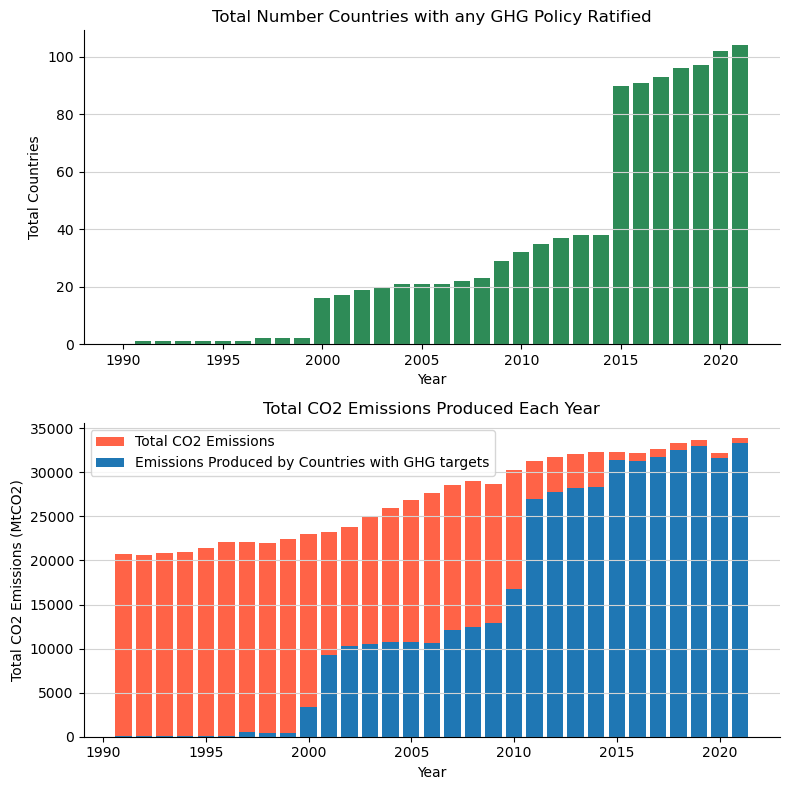

In [7]:
# Create time series plot that show the total number of countries with a GHG policy ratified from 1990-2021
policy_time_series = clean.groupby('Year')['GHG Policy Ratified'].sum().reset_index()

# Create bar graph that plots total CO2 emissions produced each year by countries with a GHG policy ratified
# Group all countries by year and sum the total CO2 emissions for each year
total_emissions = clean.groupby('Year')['Total CO2'].sum().reset_index()
# Sum the total CO2 emissions for each year only including countries with a GHG policy ratified
policy_emissions = clean[clean['GHG Policy Ratified'] == 1].groupby('Year')['Total CO2'].sum().reset_index()
# Merge the two dataframes on year
emissions_policy = pd.merge(total_emissions, policy_emissions, on='Year')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot the first graph in the first subplot
ax1.bar(policy_time_series['Year'], policy_time_series['GHG Policy Ratified'], color='seagreen')
ax1.set_title('Total Number Countries with any GHG Policy Ratified')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Countries')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.yaxis.grid(color='lightgrey')


# Plot the second graph in the second subplot
ax2.bar(emissions_policy['Year'], emissions_policy['Total CO2_x'], label='Total CO2 Emissions', color='tomato')
ax2.bar(emissions_policy['Year'], emissions_policy['Total CO2_y'], label='Emissions Produced by Countries with GHG targets')
ax2.set_title('Total CO2 Emissions Produced Each Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total CO2 Emissions (MtCO2)')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.yaxis.grid(color='lightgrey')
ax2.legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

The graphs above show the history of countries ratifying policies with GHG emission targets. The top graph shows the total number of countries with GHG emission targets and the bottom graph shows the share of total CO2 emissions being produced by countries with these policies. The purpose of this graph is to once again show how the burden of reducing CO2 emissions is not shared equally, highlighting China, the US, and India as the largest producers of CO2 emissions. This graph uses total CO2 emissions over CO2 per capita to specifically show the disparity in emissions between countries. 

The top graph shows that until the late 90s, less than 15 countries had created legislation to reduce CO2 emissions. At this point, countries knew their CO2 emissions adversely affected the planet. However, there was not as much research or concern about the long-term repercussions of their emissions. In 1997-2000, we saw more countries acknowledge the issue of climate change. This increase in countries with policies can be credited to the Kyoto Convention, a predecessor to the Paris Climate Accords and other international treaties designed to reduce CO2 emissions. From 2000 to 2010, we saw many countries implement basic policies to reduce their output of CO2 emissions, but looking at the graph below shows us that they failed to reduce the overall output of CO2 each year. In 2015, nearly every nation in the world drafted and signed the Paris Climate Accords. It was the most successful international treaty explicitly created to address the climate crisis. The treaty is the first time most of the global community jointly acknowledged the climate crisis and made plans to address it. 

The graph below shows the share of CO2 emissions produced by countries with any policy implemented to reduce CO2 emissions. While the top graphs show how many countries have a GHG policy, this shows those countries' share of GHG output. In 2000, there were finally enough countries with a policy implemented to see the share of CO2 emissions covered by a policy. In 2002, we saw that countries responsible for roughly 1/3 of CO2 emissions per year had a policy to reduce them. The share of emissions produced by countries covered by a GHG reduction policy increased from 2000-2010 as the effects of global warming became more apparent. Between 2010 and 2015, countries responsible for producing the most emissions started implementing policies. From 2014 to 2015, we see the share of emissions covered by a policy increase; countries responsible for over 90% of emissions had a GHG reduction policy implemented to reduce future emissions. The top graph shows that over 50 countries have implemented policies after signing the Paris Climate Agreement. However, 50 countries signing the agreement covered less than 15% of the total CO2 emissions produced yearly.

These graphs tell how large economies like the US and China are responsible for a much larger share of CO2 emissions each year. For this very reason, smaller countries cannot make the same contributions to fighting climate change as the larger economies. Their lower levels of CO2 emissions can only be reduced so far, and their impact on their reductions will go unnoticed if larger economies do not take more initiative and responsibility for their emissions. This concept is commonly referred to as "Common But Differentiated Responsibilities" by the United Nations. This appears in the language of agreements like the Paris Climate Accords, stating that countries that are not as economically developed cannot be expected to contribute the same level of reduction in CO2 emission as economies that are post-industrialized. It states that more developed countries have caused more damage with their CO2 emissions and, therefore, are expected to contribute more in the fight to reduce emissions. This is an important concept to remember as we explore how CO2 emissions and economic development are connected. 

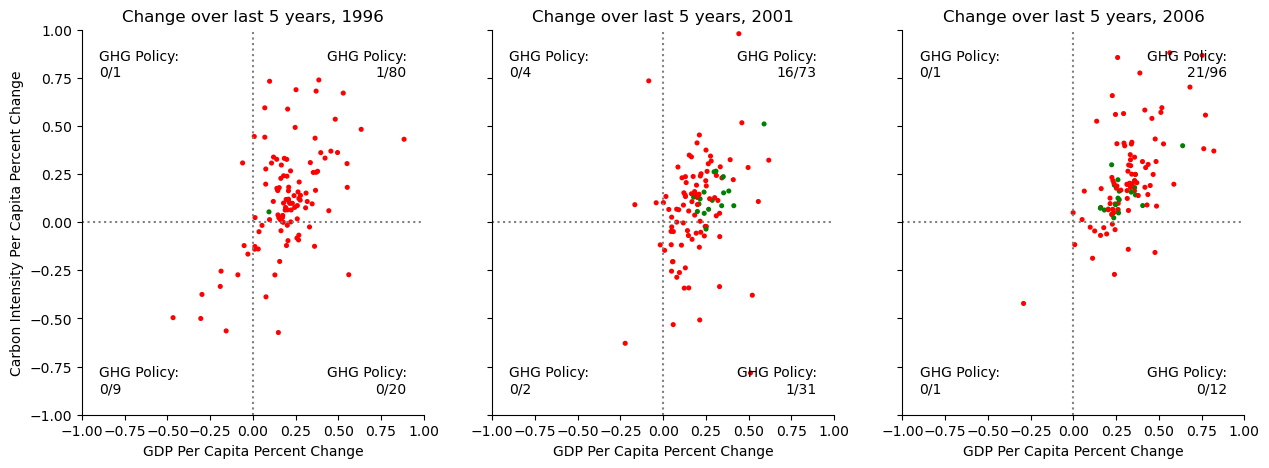

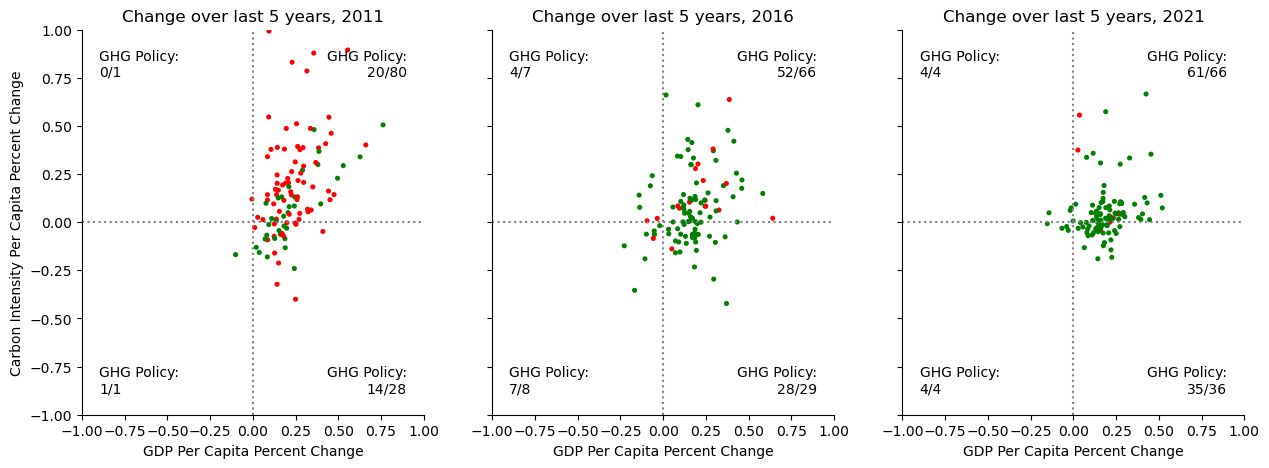

In [78]:
# Create new variable Carbon Intensity Per Capita
clean['Carbon Intensity Per Capita'] = clean['CO2 Per Capita'] / clean['Energy Intensity']

# Create Copy of cleaned data
clean_pc_5 = clean.copy()

# Function that calculates the percent change over the past X years in a specified column for each country and appends the results to the dataframe
def percent_change(df: pd.DataFrame, group: str, column: str, time:int=5) -> pd.DataFrame:
    """Calculates the percent change over the past X years in a specified column for each country and appends the results to the dataframe"""
    df[f'{column} Percent Change'] = df.groupby(group)[column].pct_change(periods=time)
    return df

emissions_pc = percent_change(clean_pc_5, 'Country', 'CO2 Per Capita')
emissions_pc = percent_change(emissions_pc, 'Country', 'GDP Per Capita')
emissions_pc = percent_change(emissions_pc, 'Country', 'Energy Intensity')
emissions_pc = percent_change(emissions_pc, 'Country', 'Carbon Intensity Per Capita')

# Totals of policy ratified and non-ratified countries in each quadrant in a given year
def four_quad_totals(df: pd.DataFrame, column_1: str, column_2:str, binary_c: str, year:int) -> tuple[int]:
    """Take a dataframe and two column names with float values. Returns a list of tuples that contain the count of
    countries with postive values in both columns, negative values in both columns, positive in column_1 negative in column_2, and
    nagative in column_1 positive in column_2 for a specified year. The first index of the tuple is the count of countires with 
    binary_c equal to 0 and the second index of the tuple is the count of countries with binary_c equal to 1"""
    # Both columns are positive and binary_c is 0
    pos_pos_0 = df[(df[column_1] > 0) & (df[column_2] > 0) & (df[binary_c] == 0) & (df['Year'] == year)][column_1].count()
    # Both columns are positive and binary_c is 1
    pos_pos_1 = df[(df[column_1] > 0) & (df[column_2] > 0) & (df[binary_c] == 1) & (df['Year'] == year)][column_1].count()
    # Both columns are negative and binary_c is 0
    neg_neg_0 = df[(df[column_1] < 0) & (df[column_2] < 0) & (df[binary_c] == 0) & (df['Year'] == year)][column_1].count()
    # Both columns are negative and binary_c is 1
    neg_neg_1 = df[(df[column_1] < 0) & (df[column_2] < 0) & (df[binary_c] == 1) & (df['Year'] == year)][column_1].count()
    # column_1 is positive and column_2 is negative and binary_c is 0
    pos_neg_0 = df[(df[column_1] > 0) & (df[column_2] < 0) & (df[binary_c] == 0) & (df['Year'] == year)][column_1].count()
    # column_1 is positive and column_2 is negative and binary_c is 1
    pos_neg_1 = df[(df[column_1] > 0) & (df[column_2] < 0) & (df[binary_c] == 1) & (df['Year'] == year)][column_1].count()
    # column_1 is negative and column_2 is positive and binary_c is 0
    neg_pos_0 = df[(df[column_1] < 0) & (df[column_2] > 0) & (df[binary_c] == 0) & (df['Year'] == year)][column_1].count()
    # column_1 is negative and column_2 is positive and binary_c is 1
    neg_pos_1 = df[(df[column_1] < 0) & (df[column_2] > 0) & (df[binary_c] == 1) & (df['Year'] == year)][column_1].count()
    return (pos_pos_0, pos_pos_1), (neg_neg_0, neg_neg_1), (pos_neg_0, pos_neg_1), (neg_pos_0, neg_pos_1)


# Function that creates multiple scatter plots that show the relationship between two columns for every country in specified years
def multiple_scatter_plots(df: pd.DataFrame, time: str, years: list[int], x: str, y: str, xrange: list[int], yrange: list[int], log_x: bool = False, log_y: bool = False) -> None:
    """Creates multiple scatter plots that show the relationship between two columns for every country in specified years"""
    fig, axs = plt.subplots(1, len(years), figsize=(15, 5), sharey=True)  # Add sharey=True to share the y-axis
    for i, year in enumerate(years):
        year_data = df[df['Year'] == year]
        if log_x:
            axs[i].set_xscale('log')
        if log_y:
            axs[i].set_yscale('log')
        axs[i].scatter(year_data[x], year_data[y], c=year_data['GHG Policy Ratified'].apply(lambda x: 'green' if x == 1 else 'red'), s=7)
        axs[i].set_xlabel(x)
        if year == 4:
            axs[i].set_title(f'Change over 4 years prior to GHG policy ratified')
        elif year == 8:
            axs[i].set_title(f'Change over 4 years after GHG policy ratified')
        else:
            axs[i].set_title(f'Change over last {time} years, {year}')
        
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].axvline(x=0, linestyle='dotted', color='gray')
        axs[i].axhline(y=0, linestyle='dotted', color='gray')
        axs[i].set_xlim(left=xrange[0], right=xrange[1])
        axs[i].set_ylim(bottom=yrange[0], top=yrange[1])
        both_pos, both_neg, gdppos_co2neg, gdpneg_co2pos = four_quad_totals(df, x, y, 'GHG Policy Ratified', year)
        # positions
        btm_l = [both_neg, 0.05, 0.05, 'left', 'bottom']
        btm_r = [gdppos_co2neg, 0.95, 0.05, 'right', 'bottom']
        top_l = [gdpneg_co2pos, 0.05, 0.95, 'left', 'top']
        top_r = [both_pos, 0.95, 0.95, 'right', 'top']
        corners = [btm_l, btm_r, top_l, top_r]
        # Textboxs
        for j in corners:
            axs[i].text(j[1], j[2], f"GHG Policy:\n{j[0][1]}/{j[0][1] + j[0][0]}", horizontalalignment=j[3],
                         verticalalignment=j[4], transform=axs[i].transAxes)
    axs[0].set_ylabel(y)
    plt.show()

# report_outliers(emissions_pc, 'GDP Per Capita Percent Change', 'CO2 Per Capita Percent Change', year, [-0.5, 1], [-0.5, 1.25])
multiple_scatter_plots(emissions_pc, '5', [1996, 2001, 2006], 'GDP Per Capita Percent Change', 'Carbon Intensity Per Capita Percent Change', [-1, 1], [-1, 1])
multiple_scatter_plots(emissions_pc, '5', [2011, 2016, 2021], 'GDP Per Capita Percent Change', 'Carbon Intensity Per Capita Percent Change', [-1, 1], [-1, 1])




This figure includes a new variable called carbon intensity per capita, which is CO2 emissions per capita divided by energy intensity, measured in metric tonnes of CO2 per capita per kilowatt-hours per dollar (MtCO2/kWh/$). Carbon intensity per capita measures a country's energy efficiency relative to its CO2 per capita, or intuitively, how carbon-intensive a country's energy consumption is. Higher values indicate that a country produces more CO2 emissions per capita per unit of energy consumed, implying the use of more carbon-intensive energy sources like fossil fuels or inefficient energy consumption. Lower values indicate a more energy-efficient country or cleaner energy sources, resulting in less carbon emissions per unit of energy consumed. 

The graphs above show the percent change in GDP and carbon intensity per capita relative to 5 years prior; for example, the 1996 graph shows the percent change in carbon intensity per capita and GDP per capita since 1991. Green dots on this graph represent countries with GHG reduction targets, and red represents countries that do not. As the graphs move from 1996 to 2021, the number of countries with a GHG reduction policy increases. The graphs are split into four quadrants. The dots in the left quadrants indicate that GDP per capita has decreased relative to 5 years prior, with the right quadrants representing GDP per capita growth. The upper quadrants indicate higher carbon intensity per capita from 5 years prior, and the lower quadrants indicate lower carbon intensity per capita. In each corner, a fraction indicates the countries with GHG reduction target policies and the total number of countries in that quadrant. 

The figure as a whole shows us a couple of trends. First, it shows the gradual recognition of climate change as an international issue with the increasing amount of green dots in each graph. The gradual increase in green dots reflects how climate change and the effects of CO2 emissions have been recognized by an increasing number of countries since 1990. The top right quadrant shows countries with increased GDP per capita and carbon intensity per capita. Between 1996 and 2006, no clear trends or relationships exist between GDP and carbon intensity. During this period, many countries were not concerned about their CO2 emissions. While more countries started recognizing climate change as an issue, only 21 countries had implemented GHG reduction targets by 2006. From 2001 to 2006, there was an increase in countries in the top right quadrant, suggesting a period of economic expansion. During this time, countries produced more GDP per capita and had higher carbon intensity, meaning they had more carbon-intensive energy consumption. The graphs showing the 1996 and 2001 changes do not provide any insight into how GHG reduction targets impact the relationship between economic development and CO2 emissions due to the lack of countries with these policies. While a few countries had a decrease in GDP per capita yearly, graphs from 1996 to 2011 show a general trend indicating increases in GDP per capita correlate with shifts toward more carbon-intensive energy consumption.

Since 2006, the number of countries in the top right quadrant has decreased or remained constant from 96 to 66, with more countries moving towards the bottom right quadrant. The bottom right quadrant indicates countries with increased GDP per capita while moving towards lower carbon intensity. From 2006 to 2021, there was an increase in countries in the bottom right quadrant, from 12 to 36, indicating a slow transition towards less carbon-intensive technology and energy consumption. Additionally, the dots in the top right quadrant are less spread out by 2021, mostly clustered within 0.25 percentage points of 0 change in carbon intensity. This is a significant improvement from 1996 when countries underwent a wide range of changes in efficiency. While most countries implemented GHG reduction targets after 2010, these graphs show a general trend that agrees with the results of Singh et al. (2019) and Bhattacharya et al. (2016), who state that renewable energy technologies are conducive to economic growth, as more countries can increase their GDP per capita while still moving toward less carbon-intensive technologies. However, it is important to note that the changes shown in these graphs are less than a 1% difference over five years. These changes are minuscule in the bigger picture of reducing global emissions and preventing adverse effects of climate change. While we are starting to level off our emissions output, significant progress still needs to be made to reach sustainable emissions levels. 

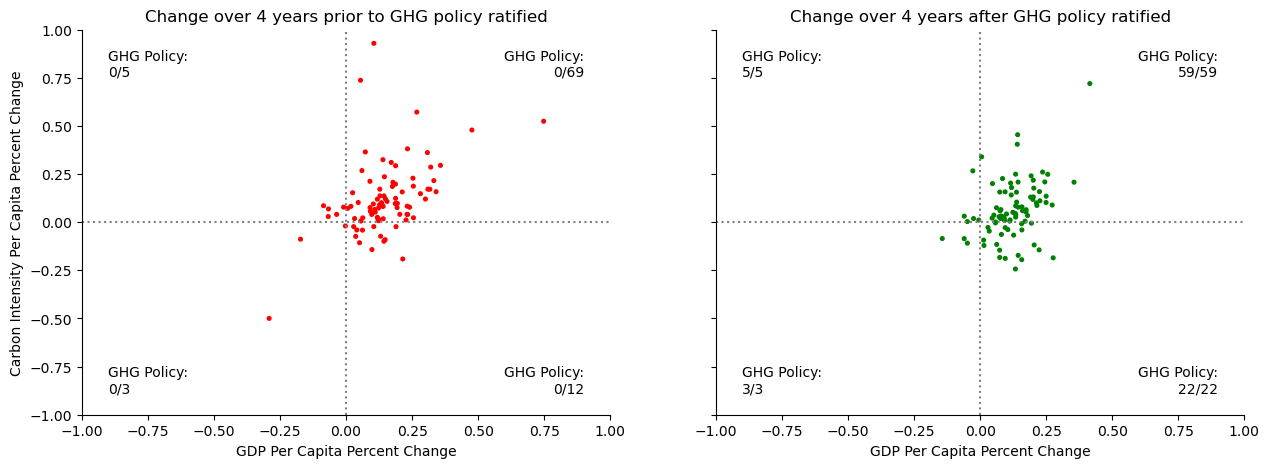

In [79]:
# Create a dataset with only observations with a GHG policy ratified
policy = clean[clean['GHG Policy Ratified'] == 1]
# Create a dataset with only observations with no GHG policy ratified
no_policy = clean[clean['GHG Policy Ratified'] == 0]

# Create dataframes that contain the first observation for each country in policy
first_policy = policy.groupby('Country').first().reset_index()
first_policy = first_policy[['ISO', 'Year']]
first_policy.rename(columns={'Year': 'GHG Policy Year'}, inplace=True)

# Merge first_policy with policy and no_policy
policy = pd.merge(policy, first_policy, on='ISO', how='left')
no_policy = pd.merge(no_policy, first_policy, on='ISO', how='left')

val = 4

# Remove all observations that are not within the window
policy = policy[policy['Year'] - policy['GHG Policy Year'] <= val-1]
no_policy = no_policy[no_policy['GHG Policy Year'] - no_policy['Year'] <= val]

# Remove countries with missing observations
policy = policy.groupby('Country').filter(lambda x: len(x) == val)
no_policy = no_policy.groupby('Country').filter(lambda x: len(x) == val)

# Remove all countries with missing data in window
missing_policy_ci = missing_data(policy, 'Carbon Intensity Per Capita')
missing_policy_gdp = missing_data(policy, 'GDP Per Capita')
missing_no_policy_ci = missing_data(no_policy, 'Carbon Intensity Per Capita')
missing_no_policy_gdp = missing_data(no_policy, 'GDP Per Capita')
missing = list(set(missing_policy_ci) | set(missing_policy_gdp) | set(missing_no_policy_ci) | set(missing_no_policy_gdp))
for country in missing:
    policy = remove_country(policy, country)
    no_policy = remove_country(no_policy, country)

# Create dataset that removes all observations from clean that are not in policy or no_policy based on ID
clean_no_policy = clean[clean['ID'].isin(policy['ID']) | clean['ID'].isin(no_policy['ID'])]

# Remove all countries with less than 8 observations
clean_no_policy = clean_no_policy.groupby('Country').filter(lambda x: len(x) == 8)

# Duplicate 'Year' column
clean_no_policy['Original Year'] = clean_no_policy['Year']

# Change values in 'Year' column to repeat 1-8
clean_no_policy['Year'] = clean_no_policy.groupby('Country').cumcount() + 1

emissions_pc_4 = percent_change(clean_no_policy, 'Country', 'GDP Per Capita', 3)
emissions_pc_4 = percent_change(emissions_pc_4, 'Country', 'Carbon Intensity Per Capita', 3)

multiple_scatter_plots(emissions_pc_4, 4, [4, 8], 'GDP Per Capita Percent Change', 'Carbon Intensity Per Capita Percent Change', [-1, 1], [-1, 1])

The plots above standardizes the year each county ratified a GHG policy. The graph on the left with the red dots shows the change in GDP and Carbon Intensity per capita over 4 years prior to ratifying a GHG policy. On the right is the change in GDP and Carbon Intensity per capita for the 4 years following a GHG policy being ratified. Overall the figure shows a clustering effect, similar to the graphs from the prior figure with countries moving slightly closer to zero percent change in Carbon intensity. Comparing the number of countries in each quadrant, countries that are increasing GDP per capita while also reducing carbon intensity increases by ten, indicating that certain policies have been effective in reducing emission without sacrificing development. The time range for these graphs use a four year comparison rather than a five year comparison since many countries in this data set did not have a policy till 2015 or later and the energy consumption data only goes to 2018. It is hard to determine anything concrete from these graphs on the effectiveness of GHG reduction targets due to the short time frame and limited research on GHG policies, but as we continue to study this complex dynamic we can isolate the effective parts of these policies to improve them for the future.   

# Project 2
## THE MESSAGE
The production and use of fossil fuels are essential in countries' economic development, with higher CO2 emissions correlated with increased economic development. Current policies, like GHG reduction targets, are not yet an effective way to reduce emissions as countries today have not been able to cross the development threshold for reducing emissions, without developing a dependence on fossil fuels, supporting the existence of an EKC curve.

The graph below shows the relationship between improvements in level of economic development (measured by change in GDP per capita) vs. the change in CO2 per capita from 1990-2018. Countries with high levels of economic development are indicated by the green dots, these are countries who had a 'High' or 'Very High' HDI in 1990. Countries with low levels of economic development are indicated by the blue dots, these are countries who had a 'Low' or 'Medium' HDI in 2018. The red dots represent countries who moved from a 'Low' or 'Medium' HDI to a 'High' or 'Very High' HDI by 2018. The red dot countries have had significant economic development during this period, and they have also have proportionally large increases in CO2 per capita to reach these increased levels of development. 

This graph illustrates how the green countries, ones that were at 'High' and 'Very high' levels of development during this entire time period have been able to increase their GDP per capita significantly during this period, while also reducing their CO2 per capita, suggesting they have crossed the threshold requirement for renewable energies and development to push for reduce emissions, but not at the cost of GDP. The low development countries see a similar effect as the red observations, where larger increases in GDP per capita also increases CO2 per capita. These countries are on a similar path as the red ones to higher levels of development, but this comes at the cost of higher emissions.  

Over 80% of the world's power generation comes from fossil fuels (Antonakakis et al., 2017), and countless scientific studies have made it clear that our current emissions levels are not sustainable in the long run. As the population increases and our global demand for power generation continues to increase, CO2 emissions will only become more abundant, especially if we do not adequately invest in renewable energy technology to make them more affordable and reliable energy sources. In order to allow for continued economic development globally, the shift to renewable technologies needs to be a top priority for all countries, especially countries with high economic development due to their high carbon intensity and greater economic capacity to transition to low-carbon technologies.

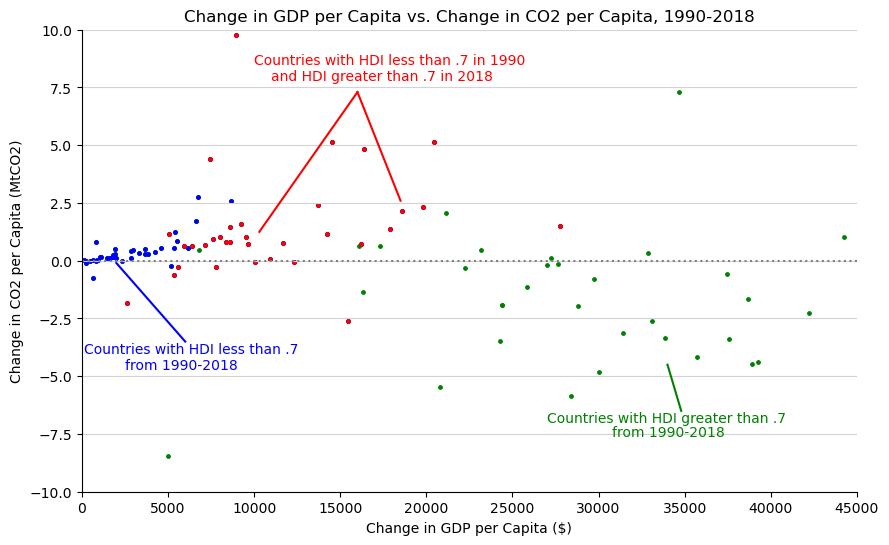

In [10]:
# Create dataframe with only 1990 observations
clean_1990 = clean[clean['Year'] == 1990]
# Create dataframe with only 2018 observations
clean_2018 = clean[clean['Year'] == 2018]
# Join the two dataframes on country
change = pd.merge(clean_1990, clean_2018, on='Country', suffixes=('_1990', '_2018'))

# Create variable that shows the change in Carbon intensity per capita, CO2 per capita, HDI, GDP Per capita, and Energy Intensity
change['Carbon Intensity Change'] = change['Carbon Intensity Per Capita_2018'] - change['Carbon Intensity Per Capita_1990']
change['HDI Change'] = change['HDI_2018'] - change['HDI_1990']
change['CO2 Change'] = change['CO2 Per Capita_2018'] - change['CO2 Per Capita_1990']
change['GDP Change'] = change['GDP Per Capita_2018'] - change['GDP Per Capita_1990']
change['Energy Intensity Change'] = change['Energy Intensity_2018'] - change['Energy Intensity_1990']

# Calculate percent change in Carbon intensity per capita, CO2 per capita, HDI, GDP Per capita, and Energy Intensity
change['Carbon Intensity PC'] = change['Carbon Intensity Change'] / change['Carbon Intensity Per Capita_1990']
change['HDI PC'] = change['HDI Change'] / change['HDI_1990']
change['CO2 PC'] = change['CO2 Change'] / change['CO2 Per Capita_1990']
change['GDP PC'] = change['GDP Change'] / change['GDP Per Capita_1990']
change['Energy Intensity PC'] = change['Energy Intensity Change'] / change['Energy Intensity_1990']

# Create variable ln GDP change that is the natural log of the GDP change
change['ln GDP Change'] = np.log(change['GDP Change'] + 1)


# make a copy of change dataframe called change_1
change_1 = change.copy()

# Remove all contrieis with High or Very High HDI in 1990
change_h = change[change['HDI_1990'] < 0.7]
# Remove all countries with Low or Medium HDI in 2018
change_l = change_h[change_h['HDI_2018'] > 0.7]
plt.figure(figsize=(10, 6))
plt.scatter(change['GDP Change'], change['CO2 Change'], color='green', s=6)
plt.scatter(change_h['GDP Change'], change_h['CO2 Change'], color='blue', s=6)
plt.scatter(change_l['GDP Change'], change_l['CO2 Change'], color='red', s=6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_ylim(bottom=-10, top=10)
plt.gca().set_xlim(left=0, right=45000)
plt.gca().axhline(y=0, linestyle='dotted', color='gray')
plt.title('Change in GDP per Capita vs. Change in CO2 per Capita, 1990-2018')
plt.xlabel('Change in GDP per Capita ($)')
plt.ylabel('Change in CO2 per Capita (MtCO2)')
plt.text(100, -4, 'Countries with HDI less than .7', color='blue')
plt.text(2500, -4.7, 'from 1990-2018', color='blue')
plt.plot([6000, 2000], [-3.5, -.1], color='blue')
plt.text(10000, 8.5, 'Countries with HDI less than .7 in 1990', color='red')
plt.text(11000, 7.8, 'and HDI greater than .7 in 2018', color='red')
plt.plot([10300, 16000], [1.25, 7.3], color='red')
plt.plot([18500, 16000], [2.6, 7.3], color='red')
plt.text(27000, -7, 'Countries with HDI greater than .7', color='green')
plt.text(30800, -7.6, 'from 1990-2018', color='green')
plt.plot([34800, 34000], [-6.5, -4.5], color='green')
plt.gca().yaxis.grid(color='lightgrey')
plt.show()

## Maps and Interpreations

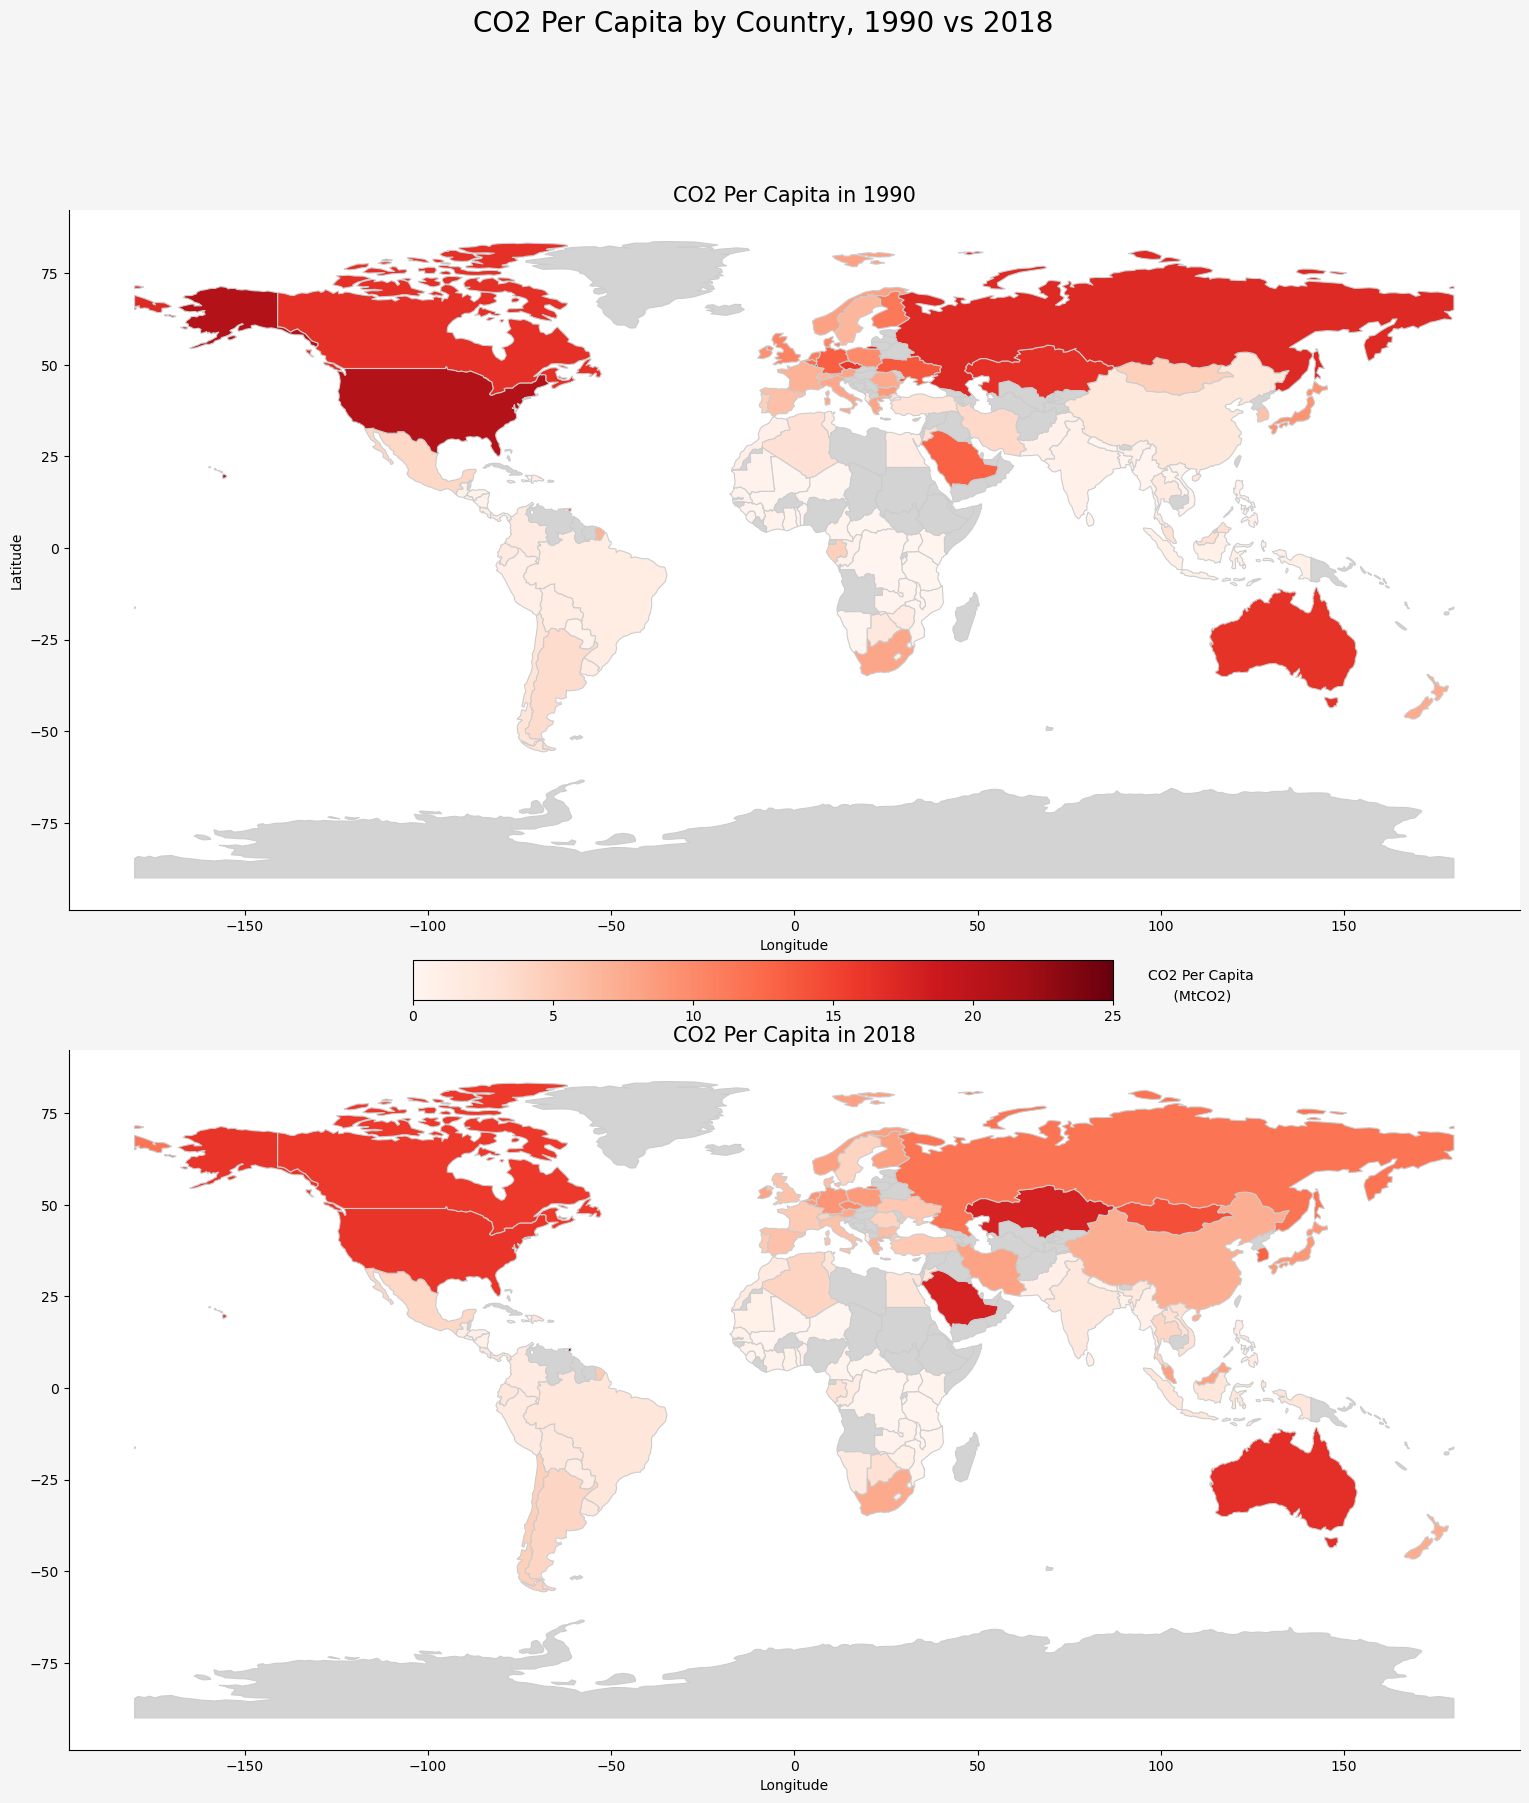

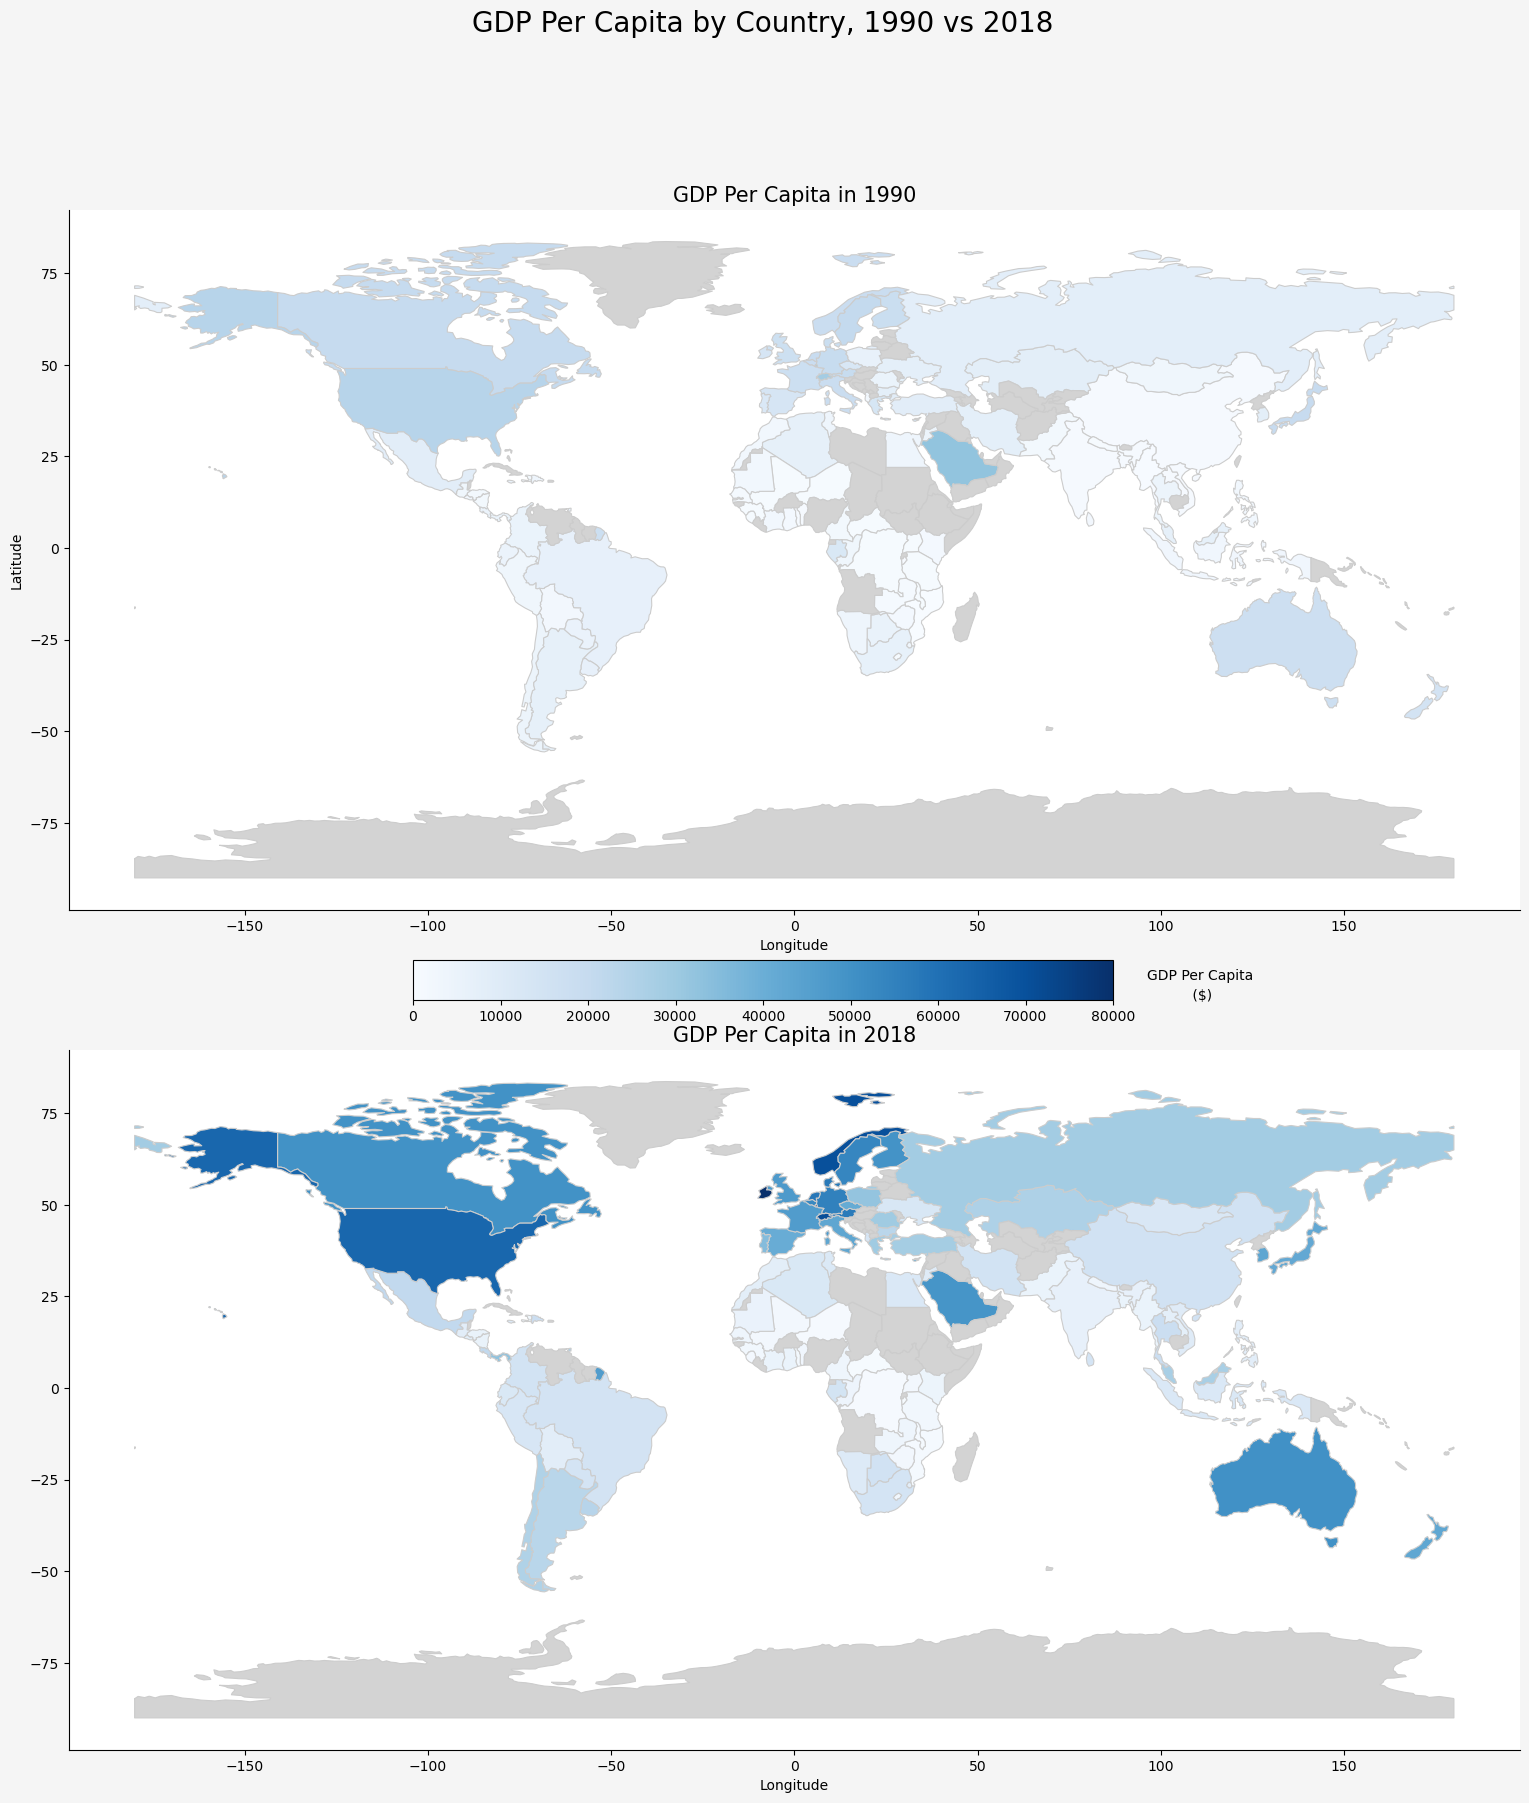

In [11]:
# Create a geopandas dataframe with the world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
# Create dataframe with only observations for 1990 and 2018
clean_1990 = clean[clean['Year'] == 1990]
clean_2018 = clean[clean['Year'] == 2018]

# Create a geopandas dataframe with the world map
world_2018 = world.join(clean_2018.set_index('ISO'), how='outer', rsuffix='_2018')
world_1990 = world.join(clean_1990.set_index('ISO'), how='outer', rsuffix='_1990')

def plot_2_maps(geo_df_left, geo_df_right, column, min_val, max_val, unit=0, color='Reds'):
    """Plot two maps side by side for the specified column"""
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    fig.suptitle(column + ' by Country, 1990 vs 2018', fontsize=20)
    fig.set_facecolor((0.96, 0.96, 0.96))
    # Create a single legend for both subplots
    cax = fig.add_axes([0.49, 0.2, 0.62, 0.2])
    # Plot 1990 map
    geo_df_left.plot(column=column, cmap=color, linewidth=0.8, ax=axs[0], edgecolor='0.8', legend=False, vmin=min_val, vmax=max_val, missing_kwds={"color": "lightgrey", "label": "Missing values"})
    axs[0].set_title(column + ' in 1990', fontsize=15)
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[0].set_xlabel('Longitude')
    axs[0].set_ylabel('Latitude')
    # Plot 2018
    geo_df_right.plot(column=column, cmap=color, linewidth=0.8, ax=axs[1], edgecolor='0.8', legend=False, vmin=min_val, vmax=max_val, missing_kwds={"color": "lightgrey", "label": "Missing values"})
    axs[1].set_title(column + ' in 2018', fontsize=15)
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    axs[1].set_xlabel('Longitude')
    # Create a single legend for both subplots
    sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=min_val, vmax=max_val))
    sm.set_array([])
    fig.colorbar(sm, cax=cax)
    if unit == 0:
        fig.text(0.5, 0.84, column, ha='center')
    else:
        fig.text(0.5, 0.87, column, ha='center')
        fig.text(0.5, 0.84,' (' + unit + ')', ha='center')
    fig.sharey=True
    plt.show()

def plot_2_mapsh(geo_df_left, geo_df_right, column, min_val, max_val, unit=0, color='Reds', start='1990', end='2018'):
    """Plot two maps stacked on top of each other for the specified column"""
    fig, axs = plt.subplots(2, 1, figsize=(25, 20))
    fig.suptitle(column + ' by Country, ' + start + ' vs ' + end, fontsize=20)
    fig.set_facecolor((0.96, 0.96, 0.96))
    # Create a single legend for both subplots
    cax = fig.add_axes([.36, 0.485, 0.28, .02])
    # Plot 1990 map
    geo_df_left.plot(column=column, cmap=color, linewidth=0.8, ax=axs[0], edgecolor='0.8', legend=False, vmin=min_val, vmax=max_val, missing_kwds={"color": "lightgrey", "label": "Missing values"})
    axs[0].set_title(column + ' in ' + start, fontsize=15)
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[0].set_xlabel('Longitude')
    axs[0].set_ylabel('Latitude')
    # Plot 2018
    geo_df_right.plot(column=column, cmap=color, linewidth=0.8, ax=axs[1], edgecolor='0.8', legend=False, vmin=min_val, vmax=max_val, missing_kwds={"color": "lightgrey", "label": "Missing values"})
    axs[1].set_title(column + ' in ' + end, fontsize=15)
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    axs[1].set_xlabel('Longitude')
    # Create a single legend for both subplots
    sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=min_val, vmax=max_val))
    sm.set_array([])
    fig.colorbar(sm, cax=cax, orientation="horizontal")
    if unit == 0:
        fig.text(0.675, 0.49, column, ha='center')
    else:
        fig.text(0.675, 0.495, column, ha='center')
        fig.text(0.675, 0.485,' (' + unit + ')', ha='center')
    fig.sharex=True
    fig.tight_layout    
    plt.show()

plot_2_mapsh(world_1990, world_2018, 'CO2 Per Capita', 0, 25, 'MtCO2')
plot_2_mapsh(world_1990, world_2018, 'GDP Per Capita', 0, 80000, '$', 'Blues')

The maps above show CO2 per capita, the dependent variable, and GDP per capita for 1990 and 2018. Comparing CO2 per capita in 1990 vs. 2018, we see differences across countries where some have increased their emissions while others have reduced them. Some countries with increases are China, Mongolia, Saudi Arabia, Australia, Malaysia, and South Korea, and smaller increases for most of South America. These changes could result from increased CO2 emissions or a decrease in population. Since all of these countries have increased in population, we can determine that the increase in CO2 emissions is from a larger increase in CO2 emissions relative to the population from 1990 to 2018. Countries with a reduction in CO2 per capita include the United States, Russia, and select European countries like Germany and Ukraine. During this period, all of these countries saw population increases, meaning that reduction in CO2 per capita results from a larger increase in population relative to their CO2 emissions. Other countries have maintained similar CO2 emissions per capita during this period. 

Comparing GDP per capita in 1990 vs. 2018, we see GDP per capita growth across all countries. Countries with the largest growth in GDP per capita are the United States, Australia, Saudi Arabia, Canada, Japan, South Korea, and European countries, notably Sweden, Germany, and Ireland. Additionally, countries like Luxembourg, which are too small to see on this map, also saw significant increases in GDP per capita. 

Comparing CO2 per capita to GDP per capita, we see a correlation between countries with high GDP per capita and high CO2 emissions per capita. There are exceptions to this, like Kazakhstan, which maintained high CO2 per capita during this period but does not have a large GDP per capita relative to countries with similar levels of CO2 emissions like the United States or Saudi Arabia. GDP is another measure of economic development, so the correlation between high GDP and CO2 per capita supports prior findings that the consumption of fossil fuels is beneficial to economic development. Seeing countries like the United States, Russia, and Europe increasing GDP per capita while simultaneously decreasing CO2 emissions per capita supports the findings of Singh et al. (2019), who state that renewable energy can be conducive to economic growth. These countries have seen a decrease in CO2 emissions per capita while simultaneously growing GDP per capita. Singh et al. (2019) also noted that transitions to renewable energy had larger increases in GDP for developing countries; looking at countries with lower GDP per capita, like those in Africa, we see minimal changes in their CO2 per capita while still sustaining GDP per capita growth which could be an indicator of this effect. 

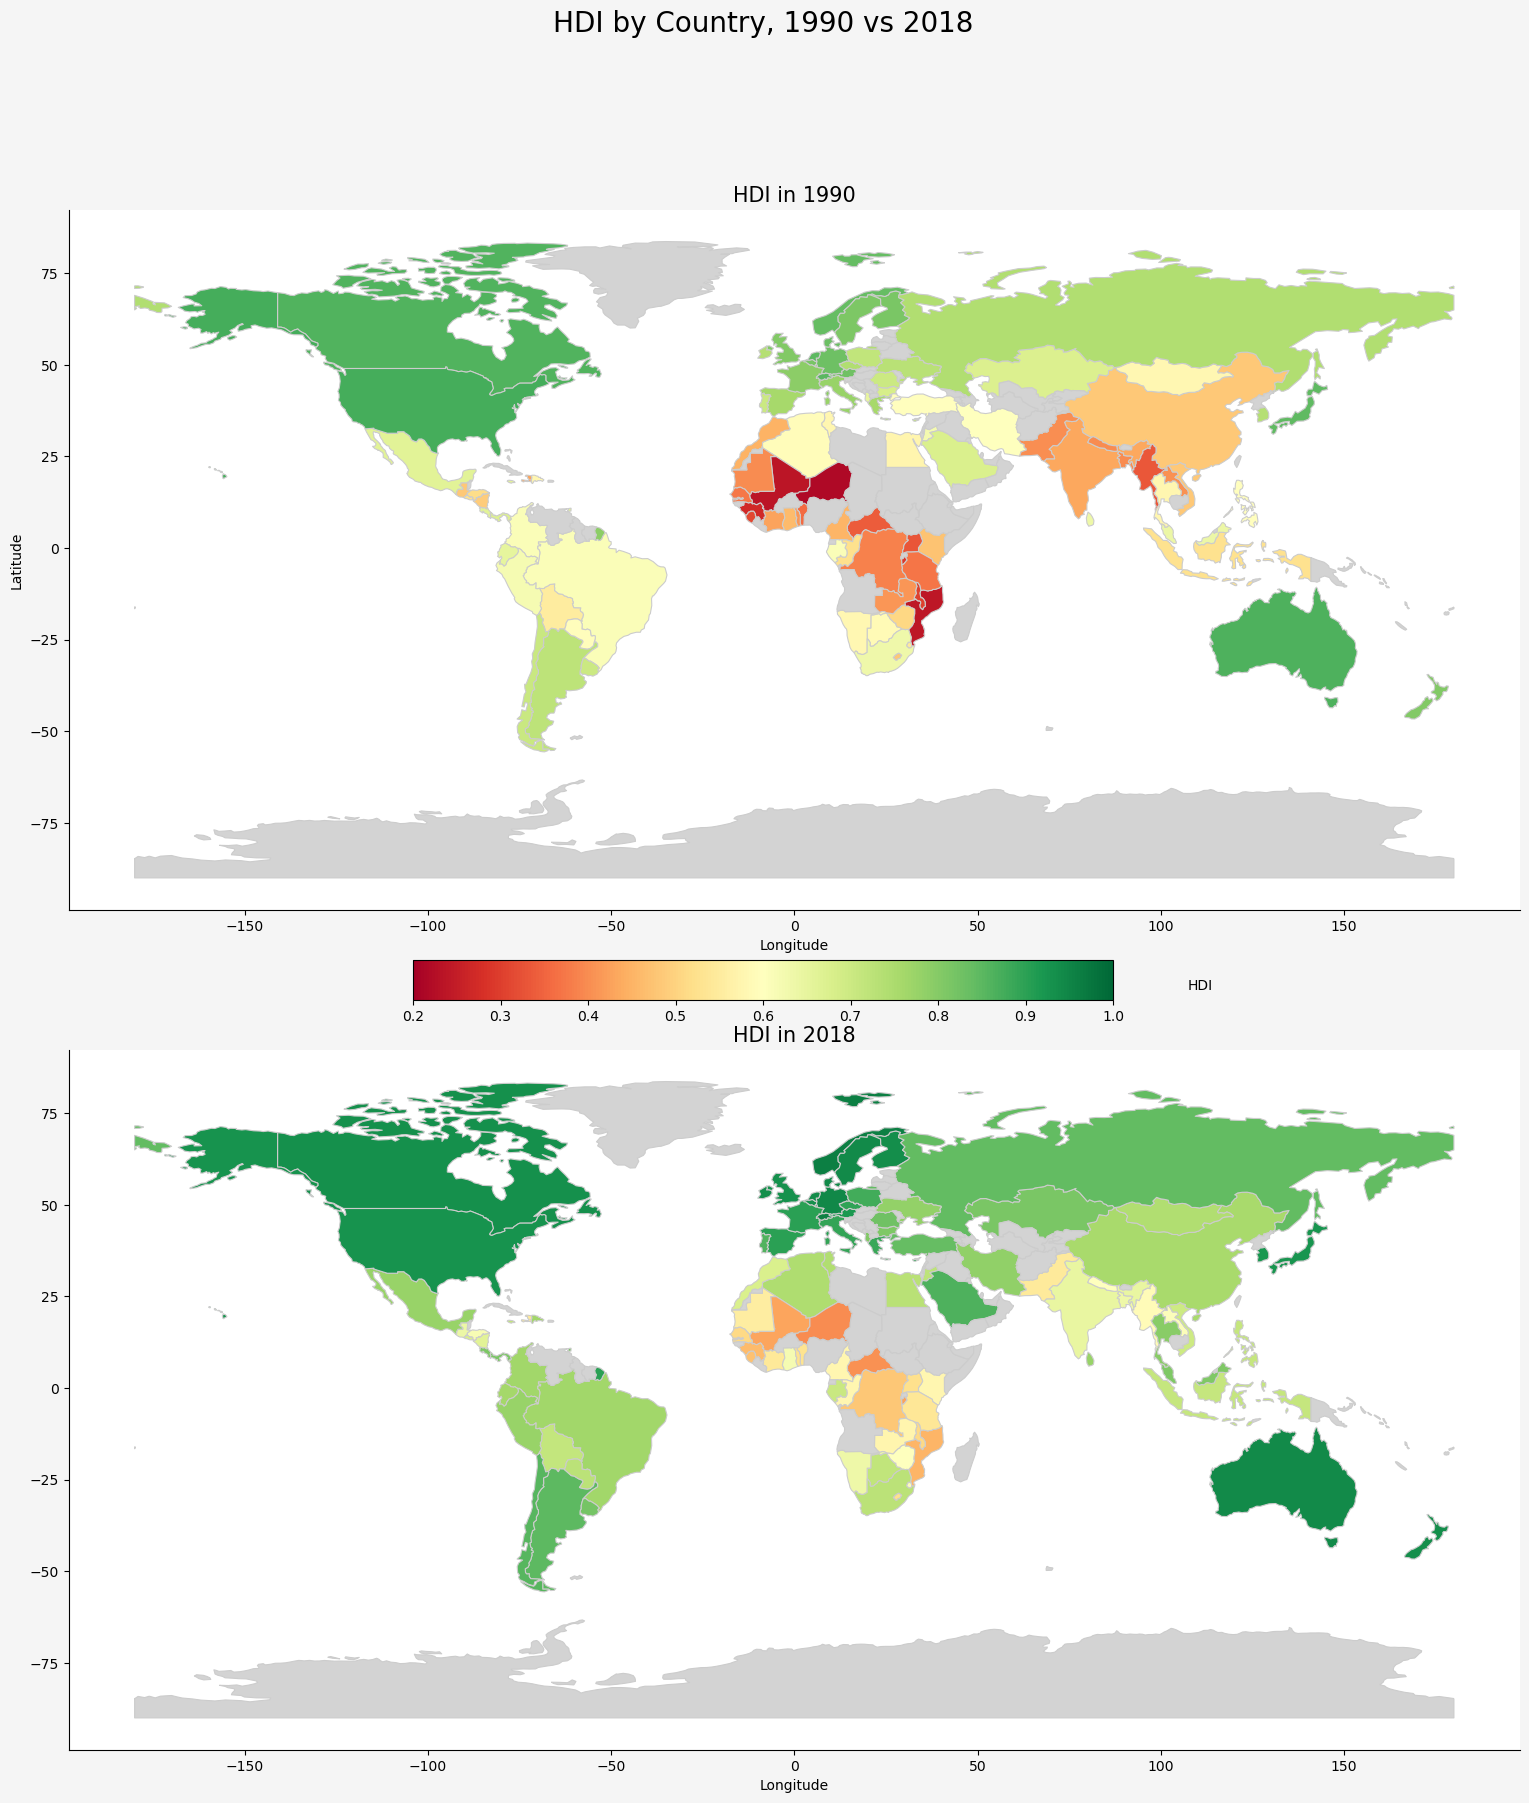

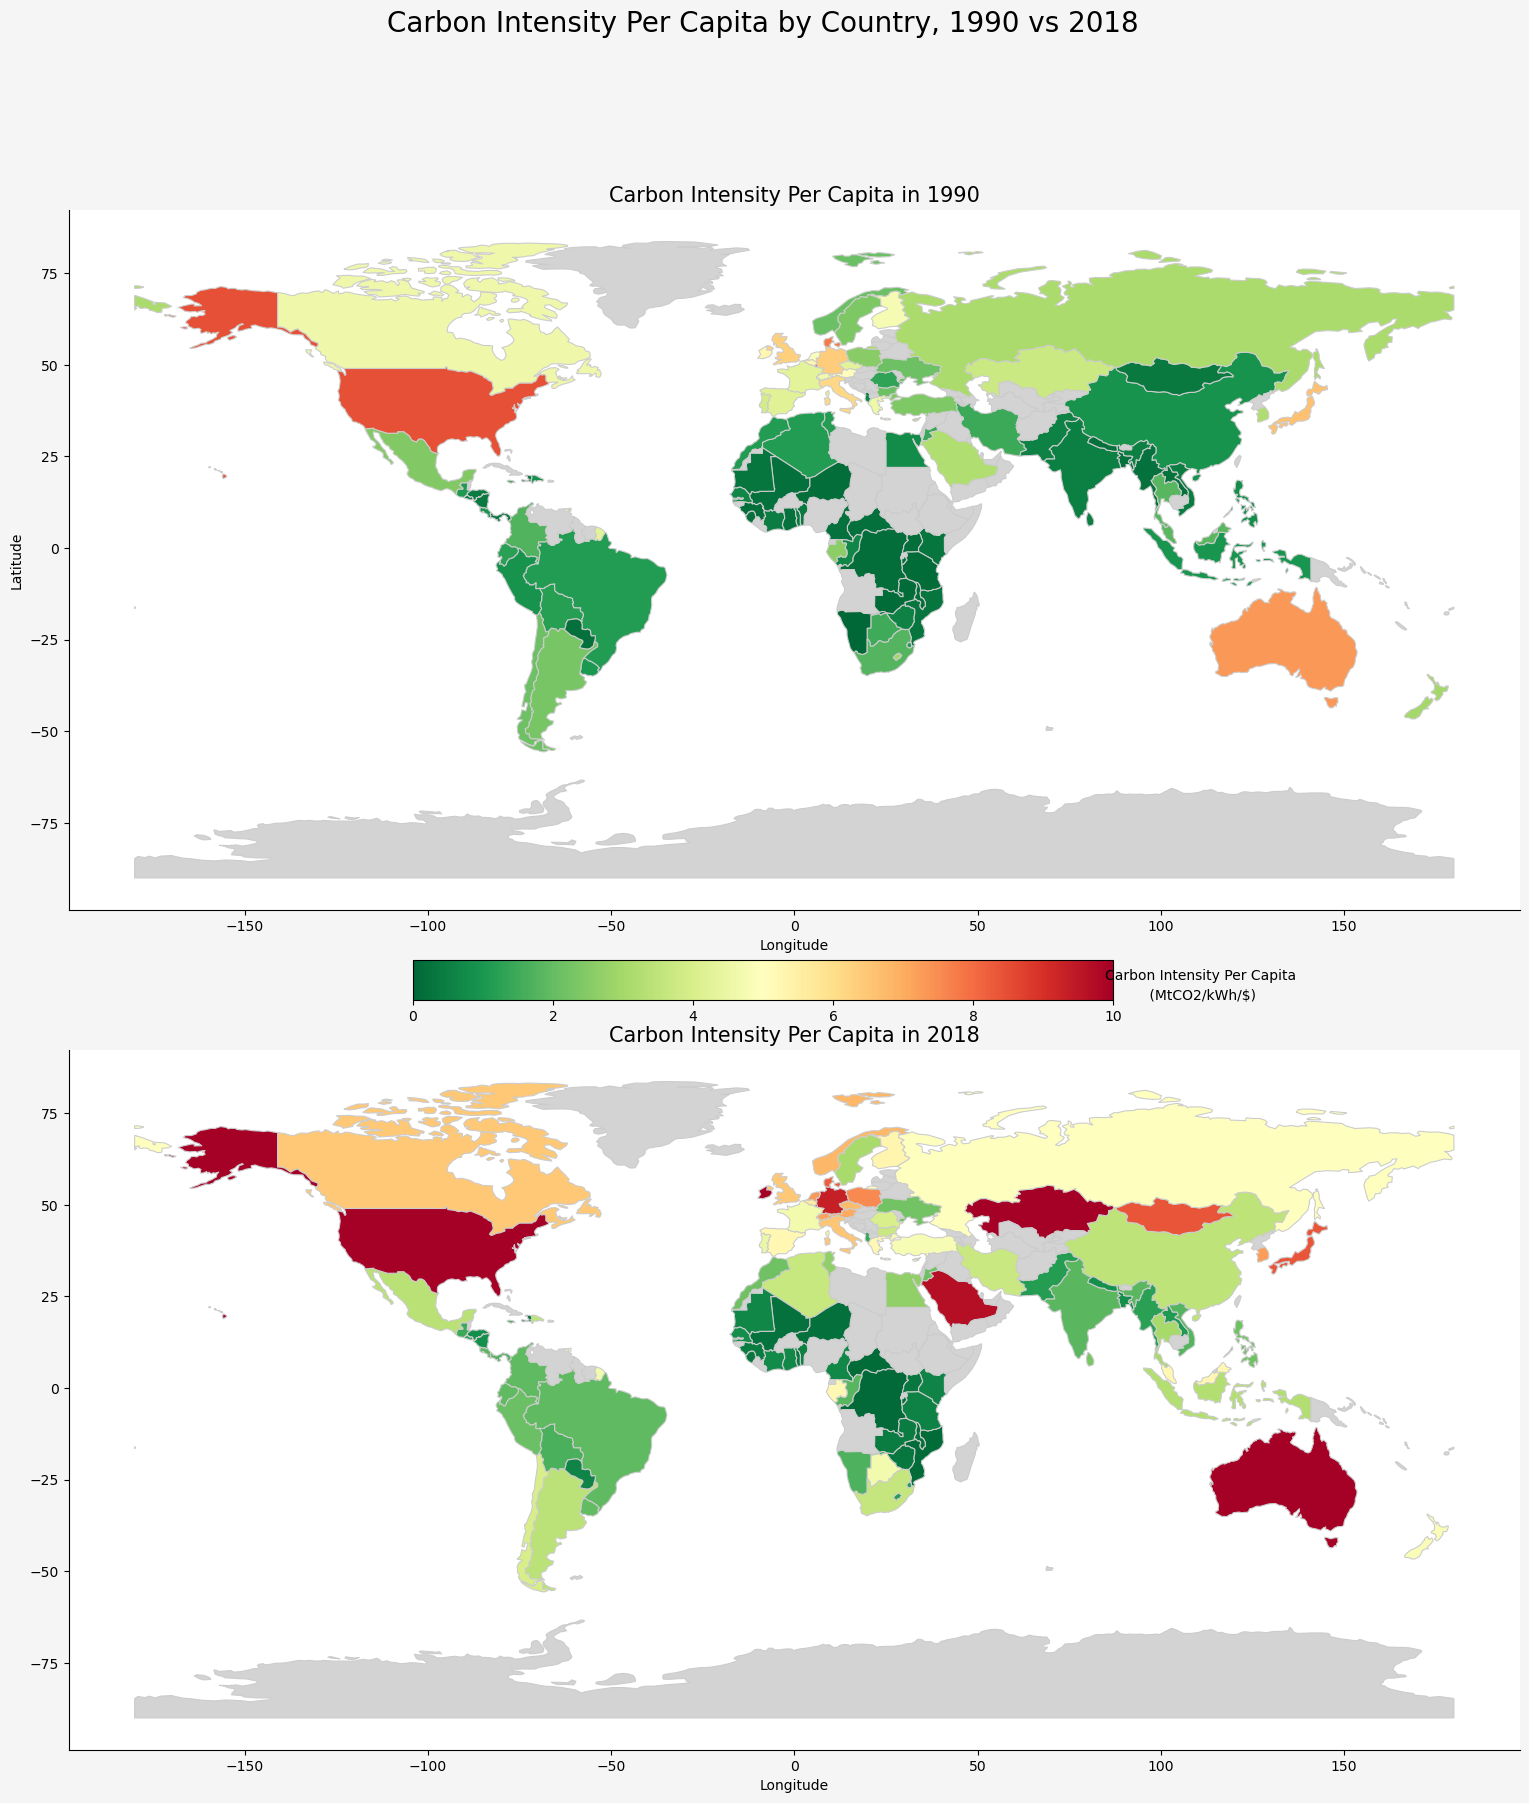

In [12]:
plot_2_mapsh(world_1990, world_2018, 'HDI', .2, 1, 0, 'RdYlGn')
plot_2_mapsh(world_1990, world_2018, 'Carbon Intensity Per Capita', 0, 10, 'MtCO2/kWh/$', 'RdYlGn_r')

The maps above show the HDI score and carbon intensity per capita by country for 1990 vs. 2018. The variables used to create these graphs are defined and cited in the variables section. The carbon intensity per capita index is CO2 per capita divided by energy intensity, which measures how carbon-intensive a country’s energy consumption is. High values indicate higher levels of CO2 emissions resulting from carbon-intensive energy production like fossil fuels. Note that the HDI scale starts at 0.2, as this dataset's lowest HDI value is 0.26. These maps show a similar relationship to the CO2 and GDP per capita maps, showing a country’s economic development measured by HDI next to its carbon intensity per capita. 

Comparing 1990 to 2018 for the HDI maps, we see a significant improvement in the HDI scores for all countries. South America and South East Asia had red or yellow-green colors in 1990, indicating a country with medium or low development. By 2018, the same regions have much higher HDI scores, with most of these regions being green, indicating significant development. Africa also saw improvement but still has a concentration of countries with low economic development. 

Comparing carbon intensity between 1990 and 2018, we see that most countries have higher carbon intensity in 2018 than in 1990. Since many countries did not take on policies with GHG reduction targets till the late 2000s or early 2010s, this is not a surprising transition. The increases in carbon intensity reflect the growing demand worldwide for energy and our reliance on fossil fuels to provide it. 

Comparing the HDI and carbon intensity per capita maps, we see the same story: countries are improving their HDI’s, a sign of economic development, while simultaneously increasing their carbon intensity. India and China, among others in Southeast Asia, show this effect, significantly improving their HDI while also turning noticeably lighter green, indicating higher carbon intensity per capita. Once again, as the world population continues to grow along with our demand for power, there is a need to improve and invest in renewable technologies to allow for continued economic development that will not come at the cost of the environment. The dependence on fossil fuels is abundantly clear and needs to be addressed immediately to prevent the continued adverse effects of global warming. Due to insufficient data for energy intensity past 2018, we cannot determine at this time how GHG reduction target policies impact carbon intensity in the long run. 


# Project 3
## Potential Data to Scrape
A potential website to scrape is the UN Framework Convention on Climate Change (UNFCCC) website which contains a table with all Intended Nationally Determined Contributions (INDC) found at https://www4.unfccc.int/sites/submissions/indc/Submission%20Pages/submissions.aspx. INDCs are plans submitted by the governing bodies who signed the Paris Climate Agreement that state the policies and actions that will be taken by a country to reduce their CO2 emissions. The policies and goals in these plans would enable me to track each country's progress for reducing CO2 emissions and make estimates on the feasibility of reaching their goals. These plans take a variety of formats each with different information, potential variables that I would want to retrieve are GHG reduction targets, sectors impacted by these targets, and any info on reduction methodology. 

To track the current progress of countries, I would add a column that states the GHG emissions target for each year in the dataset. For years where a reduction target was not explicitly stated, I would estimate the target emissions a country need to reach in order to hit their goal in time. Countries submit these INDCs with the intention of reducing their emissions during the 2020-2030 time period. The emissions data I currently have only covers up to 2022, so I would make approximations for emissions data for 2023-2030 based on historical data. Beyond the context of this course, I would continue to update the emissions dataset with yearly data to improve estimates and tracking progress. Tracking this data with GDP or HDI data would allow me track how changes in emissions and the policies used are impacting economic development, specially during a time period when countries are attempting to reduce emissions. 

## Potential Challenges
The information I want in the table is stored in individual PDFs, each with different formats and information. While I can scrape this table, I would not get the information I want from it without significant additional data processing. To get all the information, after scraping each row, I would have to put the PDF retrieved in another program to pull out variables life GHG targets and policies used. To do this I would utilize OpenAI to read the PDF and pull the variables for the dataset. For this project I cannot scrape this data due to the challenge that come with reading each PDF; I do not know how to access files using a web scrape and I do not have the financial ability to use OpenAI to process each of the PDF's. My AI knowledge is limited and I'm not sure what would be required to enable an AI to read a PDF. While I know Chat GPT 4.0 is capable of processing PDFs, for a repetitive task like pulling the same information each time it may be more effective to train an AI from scratch to fulfill this purpose. By signing the Paris Climate Agreement, countries agree to publish INDCs every five years, so this dataset would also need to be run on a reoccurring basis. Since countries signed the agreement at different times, countries are not all publishing INDC's at the same time, so running this code on a monthly or bi-annual frequency would allow for GHG targets to be continually updated. Overall, the format of this table greatly hinders my ability to process this data to get the information that would improve my project. 

## Scraping Data from a Website
Since the dataset I found is not scrapeable with my current coding ability, I'll use the practice data source provided in the excel sheet.  The packages required for data scraping, requests and BeautifulSoup, are imported at the start of the project. The first block of code is three lines. The first two lines create a variables that contains the web URL with the data for scraping and a variable that set headers for the web request, which allows the requests.get() function to request website information as if it was a browser. The final line is using the requests.get() function to pull the website data, including the HTML content. 

In [13]:
web_url = 'https://www.carbonbrief.org/analysis-which-countries-are-historically-responsible-for-climate-change/'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response = requests.get(web_url, headers=headers)

The next steps take the raw website data and convert it into an iterable object. The first line uses the BeautifulSoup package to turn the raw HTML content from the website into a more comprehensive format. The soup_object.find_all('table') function reads the HTML code for finds all the HTML tags called 'table' and puts them in a list. Since this site only has one table, I add brackets with index 0 to get only the table HTML code and not a list containing the table as its only value. 

In [14]:
soup_object = BeautifulSoup(response.content)
data_table = soup_object.find_all('table')[0]

Now that I have the HTML table, I can set up a 'for loop' to read the table and collect the data from it into a data frame. Before doing that, I set up a new data frame called cumlative_emissions to store the data from the website. This data frame has the same amount of columns as the table. The last step is breaking the table up into rows, and we do this using the find_all() function again, this time with 'tr' as the tag in the function to split each table row into different items in a single list called all_values. With the all_values list, we can make a simple for loop to iterate through the rows starting on index 1, the first row of the table with content. The find_all() function is used here one last time to split the table rows into individual cells, this is done but using the 'td' tag in the function. The values for each cell is stored in a list again, and by using the .text function for each item in this list, we can pull the text from the HTML table into a python variable. Once all the cells in the row are assigned to a variable, we add the row into the data frame, and repeat for the next row. The result is a python data frame with the same table content as the one from the website. 

In [83]:
ix = 0
cumulative_emissions = pd.DataFrame(columns = ['rank', 'country', 'cumulative emissions per population 2021',
                                                'rank_0', 'country_0', 'cumulative emissions per capita 2021'])

all_values = data_table.find_all('tr')
for row in all_values[1:]:
    values = row.find_all('td')
    rank = values[0].text.strip()
    country = values[1].text.strip()
    cumulative_per_population = values[2].text.strip()
    rank_0 = values[3].text.strip()
    country_0 = values[4].text.strip()
    cumulative_per_capita = values[5].text.strip()
    cumulative_emissions.loc[ix] = [rank, country, cumulative_per_population, rank_0, country_0, cumulative_per_capita]
    ix += 1

cumulative_emissions.head(21)

,rank,country,cumulative emissions per population 2021,rank_0,country_0,cumulative emissions per capita 2021
0,1,Canada,"1,751",1,New Zealand,"5,764"
1,2,United States,"1,547",2,Canada,"4,772"
2,3,Estonia,"1,394",3,Australia,"4,013"
3,4,Australia,"1,388",4,United States,"3,820"
4,5,Trinidad and Tobago,"1,187",5,Argentina,"3,382"
5,6,Russia,"1,181",6,Qatar,"3,340"
6,7,Kazakhstan,"1,121",7,Gabon,"2,764"
7,8,United Kingdom,"1,100",8,Malaysia,"2,342"
8,9,Germany,"1,059",9,Republic of Congo,"2,276"
9,10,Belgium,"1,053",10,Nicaragua,"2,187"


## Scraped Data Visualizations

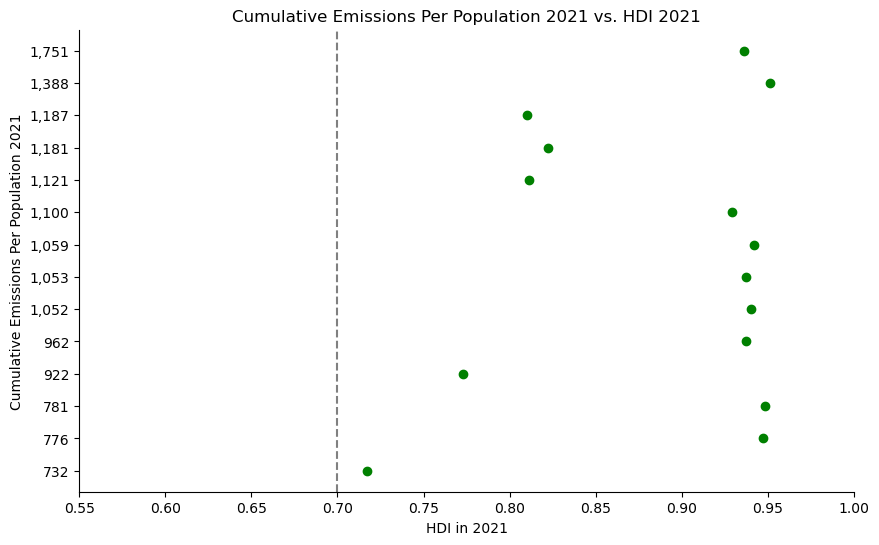

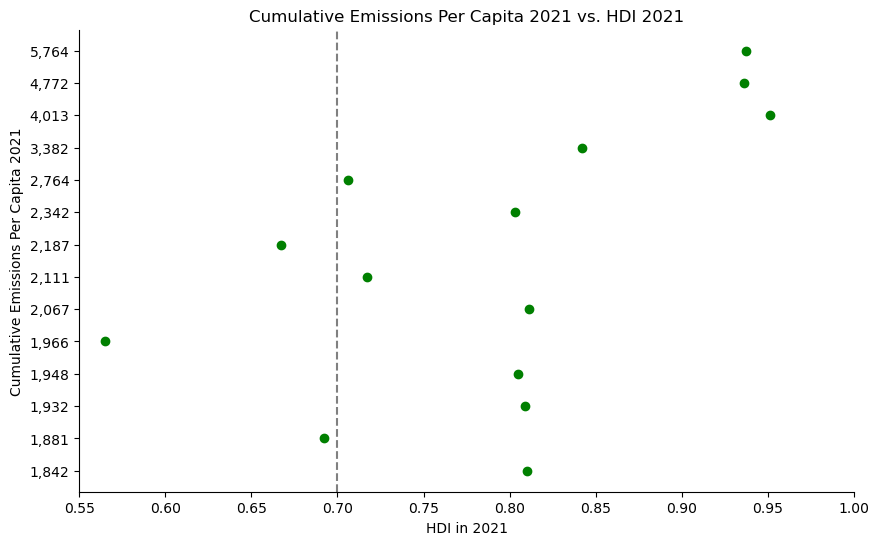

In [16]:
# Split Cumlative emissions into two dataframes
cumulative_per_population = cumulative_emissions[['country', 'rank', 'cumulative emissions per population 2021']]
cumulative_per_capita = cumulative_emissions[['country_0', 'rank_0', 'cumulative emissions per capita 2021']]
cumulative_per_population.rename(columns={'country': 'Country', 'rank': 'Rank Per Population', 'cumulative emissions per population 2021': 'Cumulative Emissions Per Population 2021'}, inplace=True)
cumulative_per_capita.rename(columns={'country_0': 'Country', 'rank_0': 'Rank Per Capita', 'cumulative emissions per capita 2021': 'Cumulative Emissions Per Capita 2021'}, inplace=True)

# Create data with only 2021 observations from clean
clean_2021 = clean[clean['Year'] == 2021]

# Merge clean with cumulative_per_population
population_merged = pd.merge(cumulative_per_population, clean_2021, on='Country', how='inner')
per_capita_merged = pd.merge(cumulative_per_capita, clean_2021, on='Country', how='inner')

# Create a scatter plot for 2 columns 
plt.figure(figsize=(10, 6))
plt.scatter(population_merged['HDI'], population_merged['Cumulative Emissions Per Population 2021'], color='green')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().invert_yaxis()
# plt.gca().set_ylim(bottom=-10, top=10)
plt.gca().set_xlim(left=.55, right=1)
plt.title('Cumulative Emissions Per Population 2021 vs. HDI 2021')
plt.xlabel('HDI in 2021')
plt.ylabel('Cumulative Emissions Per Population 2021')
plt.axvline(x=.7, color='grey', linestyle='--')
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(per_capita_merged['HDI'], per_capita_merged['Cumulative Emissions Per Capita 2021'], color='green')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().invert_yaxis()
# plt.gca().set_ylim(bottom=-10, top=10)
plt.gca().set_xlim(left=.55, right=1)
plt.title('Cumulative Emissions Per Capita 2021 vs. HDI 2021')
plt.xlabel('HDI in 2021')
plt.ylabel('Cumulative Emissions Per Capita 2021')
plt.axvline(x=.7, color='grey', linestyle='--')
plt.show()

The graphs above show a similar relationship to the first graph in this paper, showing that countries who have higher levels of emissions historically, have a 'High' or 'Very High' HDI today. The top graph shows cumulative emissions per population in 2021, which assigns emissions blame over a countries entire population throughout history. The top three countries in this category are Canada, the United States, and Estonia. Estonia is high on this list since it's energy production comes almost solely from oil sands. However this data may not be accurate as emissions are based on estimates for current land borders but using historical data, so energy generated for the Soviet Union in the past is attributed to Estonia today. The vertical line at HDI equal .7 is the line between 'low' or 'medium' HDI and 'High' and 'Very High' HDI. No countries in the top graph have an HDI below 0.7. The bottom graph shows the same relationship but only for the current population of a country, assigning emission blame on only the citizens living in the country today. The top three countries in this category are New Zealand, Canada, and Australia. These countries have produce the most emissions per capita in the history of the world relative to their population today. The bottom graph, unlike the top graph has 3 countries who are not in the high ranges of HDI, these are Nicaragua, Zambia, and Bolivia. It is unclear why these countries have such high per capita values, but it could be attributed to factors like inefficient consumption of energy resources and relatively small populations. 

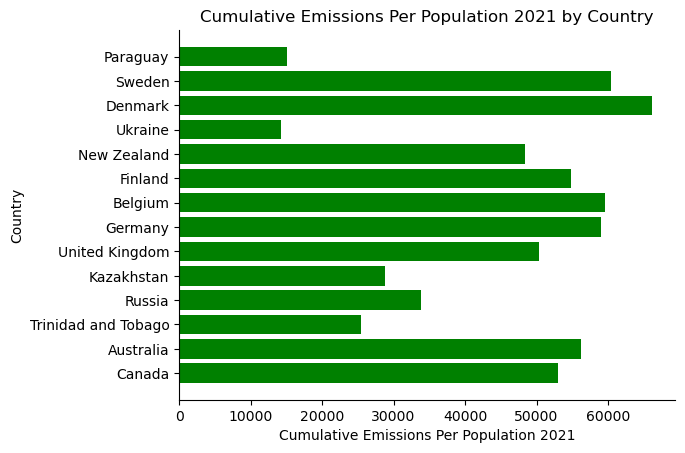

In [95]:
# Create a horizontal bar graph for cumulative_emissions_per_population showing the countries with the highest emissions
plt.barh(population_merged['Country'], population_merged['GDP Per Capita'], color='green')
# plt.gca().invert_yaxis()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Cumulative Emissions Per Population 2021 by Country')
plt.xlabel('Cumulative Emissions Per Population 2021')
plt.ylabel('Country')
plt.show()



AttributeError: 'Series' object has no attribute 'type'

## Adding a New Dataset

My current dataset is a combination of five different datasets that I put together for project 1. The variables from those datasets were chosen to test different aspects of economic development, specifically relating to CO2 emissions. Due to collection of variables already relating to development, I merged a temperature dataset to get more insight into the adverse effects of CO2 emissions. Testing to see if there is any correlation between temperature and indicators for economic development would show a clear cause and effect between high emissions and its impacts on development. Due to mismatched time periods, it is hard to find a strong correlation between these variables on the graphs and figures, but as we move onto linear regressions and covariance matricies, a relationship may become clearer. This dataset is titled "Climate Change: Earth Surface Temperature Data" and was obtained from kaggle.com


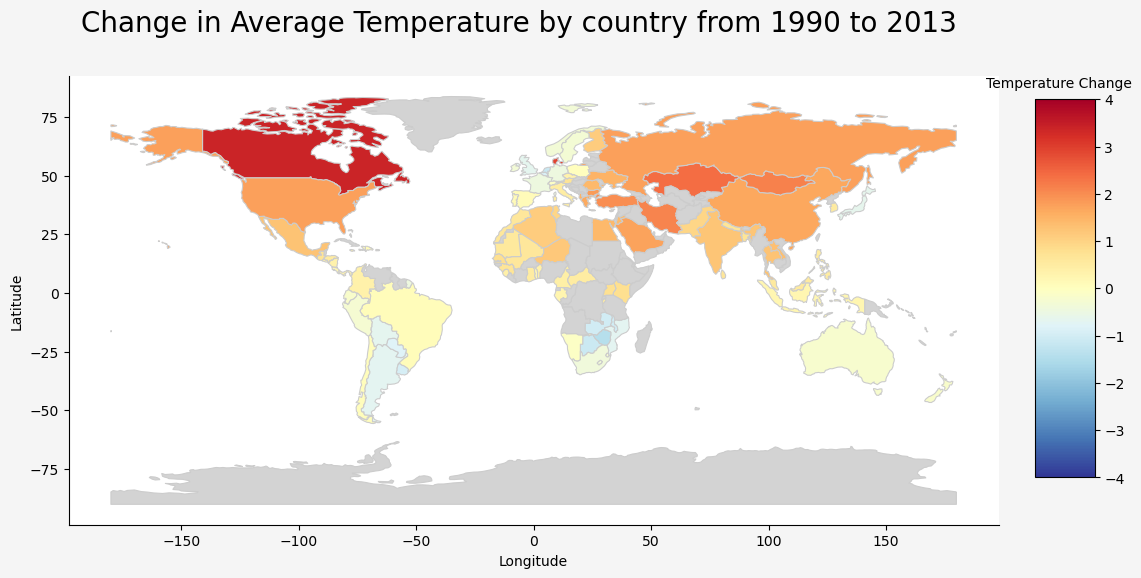

In [17]:
# Put temp data into a dataframe
temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
temp['dt'] = pd.to_datetime(temp['dt'])
# Remove all observation from before 1990
temp = temp[temp['dt'].dt.year >= 1990]

# Create a new column that contains the average temperature for each country for each year
temp['Year'] = temp['dt'].dt.year
temp = temp.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()

# Rename countries to match ISO codes
temp['Country'] = temp['Country'].replace({'Congo (Democratic Republic Of The)': 'Congo (Kinshasa)', 'Congo': 'Congo (Brazzaville)', 'Côte D\'Ivoire': 'Ivory Coast', 'Myanmar': 'Burma', 'Réunion': 'Reunion', 'São Tomé And Príncipe': 'Sao Tome and Principe', 'South Georgia And The South Sandwich Isla': 'South Georgia and the South Sandwich Islands', 'St. Barthélemy': 'Saint Barthelemy', 'St. Vincent And The Grenadines': 'Saint Vincent and the Grenadines', 'Syrian Arab Republic': 'Syria', 'Taiwan': 'Taiwan*', 'Tanzania': 'Tanzania*', 'United States': 'USA', 'Venezuela': 'Venezuela*', 'Vietnam': 'Vietnam*'})

# Merge temperature data with clean data
clean_temp = pd.merge(clean, temp, on=['Country', 'Year'], how='left')

clean_temp

# Create dataframes that only contain data for 1990 and 2013
temp_1990 = clean_temp[clean_temp['Year'] == 1990]
temp_2013 = clean_temp[clean_temp['Year'] == 2013]


# Create a geopandas dataframe with the world map
world_temp = world.join(temp_1990.set_index('ISO'), how='outer', rsuffix='_1990')
world_temp = world_temp.join(temp_2013.set_index('ISO'), how='outer', rsuffix='_2013')

# Find the percent increase in temperature from 1990 to 2013
world_temp['Temperature Change'] = world_temp['AverageTemperature_2013'] - world_temp['AverageTemperature']
world_temp['Temperature Percent Change'] = world_temp['Temperature Change'] / world_temp['AverageTemperature']

# Find the percent increase in GDP per Capita from 1960 to 2013
world_temp['GDP Change'] = world_temp['GDP Per Capita_2013'] - world_temp['GDP Per Capita']
world_temp['GDP Percent Change'] = world_temp['GDP Change'] / world_temp['GDP Per Capita']

# Find percent increase in CO2 per Capita from 1960 to 2013
world_temp['CO2 Change'] = world_temp['CO2 Per Capita_2013'] - world_temp['CO2 Per Capita']
world_temp['CO2 Percent Change'] = world_temp['CO2 Change'] / world_temp['CO2 Per Capita']

# Find percent increase in Energy Intensity from 1960 to 2013
world_temp['Energy Intensity Change'] = world_temp['Energy Intensity_2013'] - world_temp['Energy Intensity']
world_temp['Energy Intensity Percent Change'] = world_temp['Energy Intensity Change'] / world_temp['Energy Intensity']

# The change in HDI from 1990 to 2013
world_temp['HDI Change'] = world_temp['HDI_2013'] - world_temp['HDI']
world_temp['HDI Percent Change'] = world_temp['HDI Change'] / world_temp['HDI']


def plot_map(geo_df_left, column, min_val, max_val, year, title, unit=0, color='Reds'):
    """Plot a map for the specified column"""
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    fig.suptitle(title, fontsize=20)
    fig.set_facecolor((0.96, 0.96, 0.96))
    # Create a single legend for both subplots
    cax = fig.add_axes([0.93, 0.2, 0.05, 0.63])
    # Plot map
    geo_df_left.plot(column=column, cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, vmin=min_val, vmax=max_val, missing_kwds={"color": "lightgrey", "label": "Missing values"})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    # Create a single legend for both subplots
    sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=min_val, vmax=max_val))
    sm.set_array([])
    fig.colorbar(sm, cax=cax)
    if unit == 0:
        fig.text(0.95, 0.85, column, ha='center')
    else:
        fig.text(0.95, 0.88, column, ha='center')
        fig.text(0.95, 0.85,' (' + unit + ')', ha='center')
    plt.show()

plot_map(world_temp, 'Temperature Change', -4, 4, 2013, 'Change in Average Temperature by country from 1990 to 2013', 0, 'RdYlBu_r')

The map above shows the change in average temperature from 1990 to 2013. Nearly every country during this period experienced increases in temperatures except for parts of South America and southern Africa, perhaps due to differences between the northern and southern hemispheres or the hole in the ozone layer which is also in the southern hemisphere. Due to using average temperature on a country level, there are weird transitions across boarders like in Europe where the Netherlands saw a large increase in temperature but its neighbors did not see nearly the same increase in temperature. 

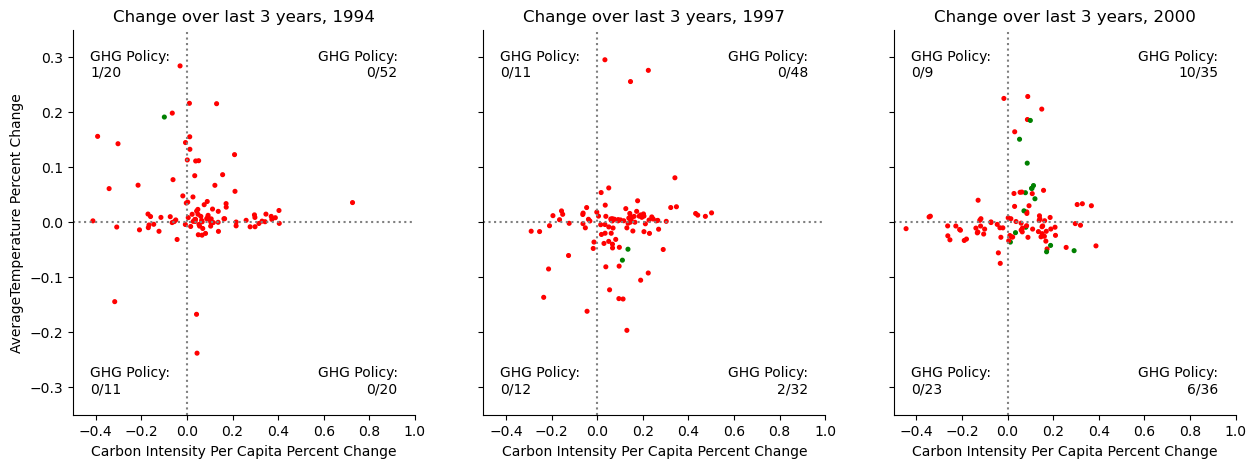

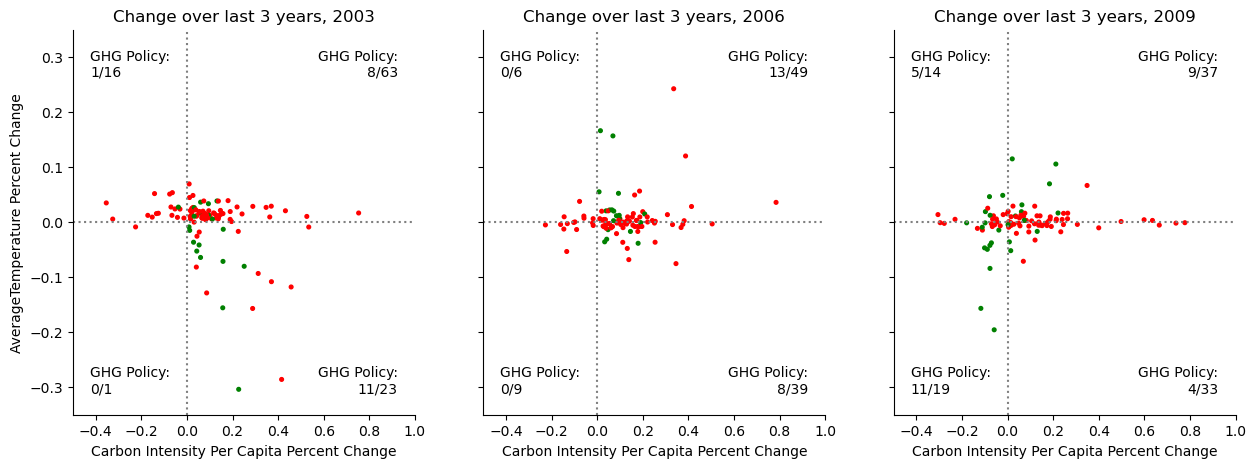

In [18]:
clean_temp = percent_change(clean_temp, 'Country', 'AverageTemperature', 3)
clean_temp = percent_change(clean_temp, 'Country', 'Carbon Intensity Per Capita', 3)

multiple_scatter_plots(clean_temp, '3', [1994, 1997, 2000], 'Carbon Intensity Per Capita Percent Change', 'AverageTemperature Percent Change', [-.5, 1], [-.35, .35])
multiple_scatter_plots(clean_temp, '3', [2003, 2006, 2009], 'Carbon Intensity Per Capita Percent Change', 'AverageTemperature Percent Change', [-.5, 1], [-.35, .35])

The graphs above show the percent change in average temperature vs. percent change in carbon intensity per capita over the past 3 years with base years 1994, 1997, 2000, 2003, 2006, and 2009. These graphs have the same indicator for countries with GHG reduction policies, with green dots indicating a ratified policy. Looking at the figure as a whole, there does not appear to be consistency in the relationship between temperature and Carbon intensity. 1994 and 1997 have many countries who experienced large changes in temperature, both positive and negative. While 2000 and 2006 have relatively clustered observations within 10% of no change in temperature. Comparing the changes in carbon intensity per capita vs average temperature, it is hard to determine if there is a consistent relationship. In 2003, it looks like there is a negative correlation between the variables, but 2009 and 1997 indicate this could be a positive relationship as well. More likely there is no relationship or the scale of this time frame is not large enough to show the full extent of the relationship. 

# Final Project
## OLS Regression Models

A non-linear relationship exists between CO2 per capita and GDP per capita as many exogenous factors influence their complex dynamic. If we consider a country that had not industrialized and had a low GDP per capita, the first factory established would cause small increases in CO2 per capita with disproportionately large increases in GDP per capita. The large increase in GDP per capita comes from a shift outward for that country's production possibility curve; technology from industrialization allows for large increases in productivity and efficiency. Conversely, a country well past its industrial age would not see the same economies of scale. These countries have well-developed industries, likely already powered by fossil fuels, creating high CO2 and GDP per capita as their baseline. Adding the same factory to this country would not have the same effect on GDP per capita as their production possibility curve has already expanded. The EKC hypothesis often describes this relationship between emissions and development in econometric literature, which states that developing countries see large increases in emissions and development with industrialization. However, it also states that a development threshold exists where countries start to value environmental quality, causing a decrease in emissions in the long run. The EKC Hypothesis states that the relationship between emissions and development has an inverted U shape, meaning high emissions economies are 'just a phase' countries must go through. The dynamic is further complicated by exogenous factors influencing GDP per capita, such as politics and trade dynamics. These external forces can cause large changes in GDP per capita without influencing CO2 per capita, making it hard to predict how changes in one affect the other. The summary statistics revealed that each variable has a large right skew. The skew further supports a non-linear relationship between emissions and development, as countries with high GDP per capita did not have the highest emissions per capita.  

The variables used in these regressions are CO2 per capita, GDP per capita, energy intensity, GHG policy ratified, and HDI. GDP per capita and HDI both serve as indicators for economic development. HDI is a composite index that includes gross national income as an indicator of development. HDI and GDP cannot be included in the same regression without violating multicollinearity. Energy intensity is an essential variable to include. Since our consumption of fossil fuels causes CO2 emissions, measuring how efficient our consumption of these resources is helps explain variation between countries with high emissions and low output or vice versa. GHG policy ratified is included to identify how reduction target policies impact changes in emissions and if they are effective at reducing emissions. Additionally, a categorical variable for each country is included in each regression, allowing us to control for differences across countries.

Differencing was used to remove time series trends, converting GDP, CO2, and energy intensity per capita to changes in GDP per capita, change in CO2 per capita, and change in energy intensity. A natural log transformation was also applied to GDP per capita to make regression results easier to interpret. The first regression model I uses the change in CO2 per capita as the dependent variable with change in GDP per capita, a dummy for GHG policy ratified, change in energy intensity, and a categorical variable for HDI grouping as independent variables. 

In [99]:
# Regression libraries
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import statsmodels.api as sm
import statsmodels.formula.api as smf
# .png display package
from IPython.display import Image

# Open cleaned_data.csv
reg_df = pd.read_csv('cleaned_data.csv')

# Rename columns removing capitals and spaces
reg_df.rename(columns = {'Country':'country', 'Year':'year', 'CO2 Per Capita':'co2_pc', 'GDP Per Capita':'gdp_pc', 'HDI':'hdi', 'Energy Intensity':'ei', 'GHG Policy Ratified':'ghg', 'HDI Category':'hdi_cat'}, inplace = True)

# # Create Carbon Intensity Per Capita
reg_df['ci_pc'] = reg_df['co2_pc'] / reg_df['ei']

# Create a new column that number each country from 0 to 109 (110 countries)
reg_df['country_fe'] = reg_df['country'].astype('category')
reg_df['country_fe'] = reg_df['country_fe'].cat.codes

# Create variable that has ln(GDP per Capita)
reg_df['ln_gdp_pc'] = np.log(reg_df['gdp_pc'])

# Create 'Change in CO2 Per Capita' and 'Change in GDP Per Capita' columns
reg_df['change_co2'] = reg_df.groupby('country')['co2_pc'].diff()
reg_df['change_gdp'] = reg_df.groupby('country')['gdp_pc'].diff()
reg_df['change_ln_gdp'] = reg_df.groupby('country')['ln_gdp_pc'].diff()
reg_df['change_hdi'] = reg_df.groupby('country')['hdi'].diff()
reg_df['change_ei'] = reg_df.groupby('country')['ei'].diff()

# Drop 1990 observations
reg_df = reg_df[reg_df['year'] != 1990]

# Make 'Country FE' a categorical variable
reg_df['country_FE'] = reg_df['country_fe'].astype('category')

# Create clean_e with observations prior to 2019 for energy intensity regressions
reg_df = reg_df[reg_df['year'] <= 2018]

warnings.filterwarnings("ignore")

# Regression models, loggdp
reg = smf.ols(formula='change_co2 ~ change_ln_gdp + C(country_FE)', data=reg_df)
reg2 = smf.ols(formula='change_co2 ~ change_ln_gdp + ghg + C(country_FE)', data=reg_df)
reg3 = smf.ols(formula='change_co2 ~ change_ln_gdp + ghg + change_ei + C(country_FE)', data=reg_df)
reg4 = smf.ols(formula='change_co2 ~ change_ln_gdp + ghg + change_ei + C(hdi_cat) + C(country_FE)', data=reg_df)

# Fit the regression models
res = reg.fit(cov_type='cluster', cov_kwds={'groups': reg_df['country_fe']})
res2 = reg2.fit(cov_type='cluster', cov_kwds={'groups': reg_df['country_fe']})
res3 = reg3.fit(cov_type='cluster', cov_kwds={'groups': reg_df['country_fe']})
res4 = reg4.fit(cov_type='cluster', cov_kwds={'groups': reg_df['country_fe']})

# Create Stargazer object
stargazer = Stargazer([res, res2, res3, res4])

# print(stargazer.render_latex())

# Print Mean square error of res3
print(res3.mse_resid)

0.2716194813783245


The table above is an image of the regression results after they have been processed through LaTeX. All of my regressions have country-fixed effects and standard errors clustered on a country level. When using the HTML Stargazer output, the regression table was over three pages long, as the table included 110 additional coefficients representing each country. While it is critical for the regressions to include country-fixed effects, these coefficients are not required to interpret the regression results. Using print(stargazer.render_latex), I took the results of the regressions and manually deleted the 110 country fixed effects coefficients to make the table easier to read. I then uploaded the cleaned LaTeX output back to the Jupiter notebook. I had to use this method as the Stargazer package currently does not have a way to hide or remove variables from table results. 

Table 1 estimates the effects of changes in ln GDP per capita on CO2 emissions per capita. Specification (1) estimates that, on average, a 1% increase in ln GDP per capita is associated with a 2.574% increase in CO2 per capita. The coefficient is significant at the 1% level with an R-squared value of 0.083. The low R-squared value indicates that there is still significant variation in CO2 per capita that cannot be explained by changes in ln GDP per capita, which we knew before, as many external factors can cause changes in CO2 per capita. The intercept of -0.151 indicates that when there is no change in ln GDP per capita, CO2 per capita decreases by 0.151%. However, it is important to note that countries will rarely see a 0% change in GDP per capita in practical terms. An f-statistic of 26.711 indicates that the results are highly significant and changes in ln GDP per capita correlate with changes in CO2 per capita. Specification (1) is a simple model with no controls; it can give a good idea of the relationship but does not tell the whole story. 

Specification (2) is the same as specification (1) but with a control variable for GHG policy ratified. Specification (2) estimates on average that a 1% increase in ln GDP per capita is associated with a 2.552% increase in CO2 per capita when controlling for GHG policy ratified. The coefficient for ln GDP per capita and the intercept are both significant at the 1% level. The R-squared value is similar to specification (1) as GHG policy does not have a significant effect on changes in CO2 per capita, meaning variation in CO2 per capita is still largely unexplained by changes in ln GDP per capita and GHG policies. The coefficient on GHG policy is -0.045, meaning that countries with a GHG policy ratified saw, on average, 0.045 metric ton decreases in CO2 per capita. However, this lacks statistical significance, and its confidence interval includes 0, meaning we cannot determine whether this effect is accurate or negative.  

Specification (3) adds a control for change in energy intensity. The coefficient for change in ln GDP per capita is similar to the specification (1) and (2) results, estimating on average that a 1% increase in ln GDP per capita is associated with a 2.780% increase in CO2 per capita when controlling for GHG policy and energy intensity. The coefficient for GHG policy ratified has a slightly large magnitude and is significant at the 10% level. However, it still has a 95% confidence interval that includes 0, indicating the effect may not even be negative. Change in energy intensity has a coefficient of 0.551, which is significant at a 1% level and indicates that a one-unit change increase in energy intensity per capita is associated with a 0.551 metric ton increase in CO2 per capita. This makes sense as increases in energy intensity are decreases in energy efficiency. So, as energy intensity increases, a country is using more fuel to produce a single unit of economic output. The R-squared values increase from specification (1) and (2) to 0.114, which is still low but indicates that more of the variation in CO2 per capita can be explained when including energy intensity as a control variable. 

Specification (4) adds another categorical variable for the HDI category to test for differences across groups, using low HDI as the reference group. This specification yielded similar results to specification (3) for ln GDP per capita and energy intensity, indicating a positive correlation with CO2 per capita. The medium and very high HDI coefficients were not significant at any level, high HDI was at a 10% level. Across the groups, there was not sufficient evidence to suggest that there are significant differences across the HDI grouping for the relationship between CO2 emissions and GDP. However, these regressions controlled for country effects, which treats each country as a different variable, so grouping the countries by HDI in the same regression would capture small effects mostly covered by differences across countries already. While the R-squared value for specification (4) is larger than specification (3), the f-statistic is nearly double in specification (3), indicating higher significance overall, indicating it is a better measure of the relationship between CO2 per capita and ln GDP per capita. See Tables 2 and 3 for better estimates of differences between HDI grouping. 

Table 1 gives statistically significant evidence that both ln GDP per capita and energy intensity are positively correlated with CO2 per capita as hypothesized in econometric theory. These regressions fail to support GHG reduction targets as effective policies for reducing CO2 emissions due to low or no statistical significance and 95% confidence intervals that include 0, meaning we cannot determine if there is a positive or negative association. One potential explanation for GHG reduction target policies having a positive association with CO2 emissions could be due to global pressure to ratify the Paris Climate Agreement, even though many countries lack the economic strength to invest in renewable technologies. Many developing countries who ratified the agreement, like Pakistan, indicated in their 2015 nationally determined contribution plan that they anticipated a 300% increase in their emissions from 2015 to 2030 due to planned economic expansion in the energy and industrial sectors. Their contribution plan states that the country must prioritize its citizens and the economy over its emissions to ensure a stable future. Many other developing countries have similar issues, where they do have GHG reduction targets, but these targets are a secondary priority to economic expansion. As of 2015, nearly every country in this dataset had GHG reduction targets due to the Paris Climate Agreement. However, these targets are non-binding, and many countries undergoing rapid development, like Pakistan, will continue to increase emissions despite efforts to reduce them. 

To further understand the differences between development, I split the dataset into four subsets based on their HDI category in the year 2015. Using the base year of 2015 allows us to compare differences between HDI groups without worrying about countries that moved to a higher or lower group during this period. Tables 2 and 3 regress the same variables as Table 1 but separates observations between low, medium, high, and very high HDIs. 

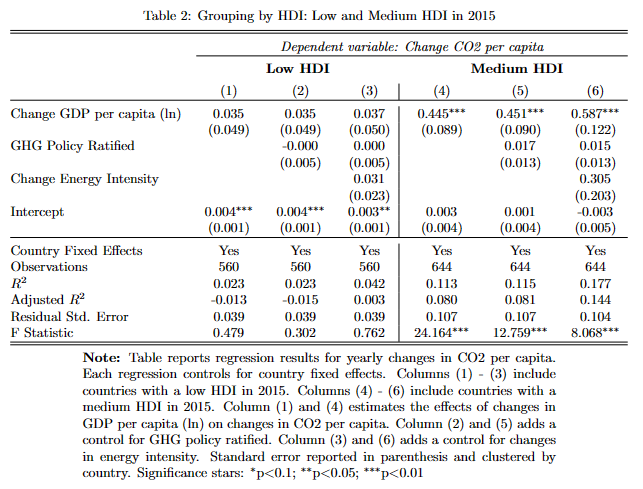

In [24]:
def set_base_year(df, year):
    """Return the dataframe with a new variable called 'HDI Category ' + year that has a country's HDI 
    category for the specified year for all observations."""
    temp_hdi = df[df['year'] == year][['country', 'hdi_cat']]
    temp_hdi.rename(columns={'hdi_cat': 'hdi_cat_' + str(year)}, inplace=True)
    base = pd.merge(df, temp_hdi, on='country', how='left')
    return base

base2015 = set_base_year(reg_df, 2015)

# Create 4 new dataframes, one for countries with Low HDI, one for countries with Medium HDI, one for countries with High HDI, and one for countries with Very High HDI
low_hdi = base2015[base2015['hdi_cat_2015'] == 0]
medium_hdi = base2015[base2015['hdi_cat_2015'] == 1]
high_hdi = base2015[base2015['hdi_cat_2015'] == 2]
very_high_hdi = base2015[base2015['hdi_cat_2015'] == 3]

# Regression models, low_hdi
reg = smf.ols(formula='change_co2 ~ change_ln_gdp + C(country_FE)', data=low_hdi)
reg2 = smf.ols(formula='change_co2 ~ change_ln_gdp + ghg + C(country_FE)', data=low_hdi)
reg3 = smf.ols(formula='change_co2 ~ change_ln_gdp + ghg + change_ei + C(country_FE)', data=low_hdi)

# Fit the regression models
res = reg.fit(cov_type='cluster', cov_kwds={'groups': low_hdi['country_fe']})
res2 = reg2.fit(cov_type='cluster', cov_kwds={'groups': low_hdi['country_fe']})
res3 = reg3.fit(cov_type='cluster', cov_kwds={'groups': low_hdi['country_fe']})

# Regression models, medium_hdi
reg4 = smf.ols(formula='change_co2 ~ change_ln_gdp + C(country_FE)', data=medium_hdi)
reg5 = smf.ols(formula='change_co2 ~ change_ln_gdp + ghg + C(country_FE)', data=medium_hdi)
reg6 = smf.ols(formula='change_co2 ~ change_ln_gdp + ghg + change_ei + C(country_FE)', data=medium_hdi)

# Fit the regression models
res4 = reg4.fit(cov_type='cluster', cov_kwds={'groups': medium_hdi['country_fe']})
res5 = reg5.fit(cov_type='cluster', cov_kwds={'groups': medium_hdi['country_fe']})
res6 = reg6.fit(cov_type='cluster', cov_kwds={'groups': medium_hdi['country_fe']})

# Regression models, high_hdi
reg7 = smf.ols(formula='change_co2 ~ change_ln_gdp + C(country_FE)', data=high_hdi)
reg8 = smf.ols(formula='change_co2 ~ change_ln_gdp + ghg + C(country_FE)', data=high_hdi)
reg9 = smf.ols(formula='change_co2 ~ change_ln_gdp + ghg + change_ei + C(country_FE)', data=high_hdi)

# Fit the regression models
res7 = reg7.fit(cov_type='cluster', cov_kwds={'groups': high_hdi['country_fe']})
res8 = reg8.fit(cov_type='cluster', cov_kwds={'groups': high_hdi['country_fe']})
res9 = reg9.fit(cov_type='cluster', cov_kwds={'groups': high_hdi['country_fe']})

# Regression models, very_high_hdi
reg10 = smf.ols(formula='change_co2 ~ change_ln_gdp + C(country_FE)', data=very_high_hdi)
reg11 = smf.ols(formula='change_co2 ~ change_ln_gdp + ghg + C(country_FE)', data=very_high_hdi)
reg12 = smf.ols(formula='change_co2 ~ change_ln_gdp + ghg + change_ei + C(country_FE)', data=very_high_hdi)

# Fit the regression models
res10 = reg10.fit(cov_type='cluster', cov_kwds={'groups': very_high_hdi['country_fe']})
res11 = reg11.fit(cov_type='cluster', cov_kwds={'groups': very_high_hdi['country_fe']})
res12 = reg12.fit(cov_type='cluster', cov_kwds={'groups': very_high_hdi['country_fe']})

# Create Stargazer object
stargazer = Stargazer([res, res2, res3, res4, res5, res6, res7, res8, res9, res10, res11, res12])

# print(stargazer.render_latex())

# Load image of regression results table without Country Fixed Effects coefficients 
Image(filename='reg_table2.png')

Table 2 estimates the effects of changes in ln GDP per capita, GHG policy ratified, and change in energy intensity on changes in CO2 emissions per capita for countries with a low and medium HDI in 2015. Specifications 1-3 use observations from low HDI countries, and 4-6 use observations from medium HDI countries. 

Table 2 specifications 1-3 indicate changes in ln GDP per capita, GHG policy ratified, and energy intensity that are not associated with changes in CO2 emissions at any significance level. The standard errors of the change in ln GDP per capita and GHG policy ratified are larger than the coefficients, indicating very low significance. The 95% confidence intervals for these variables all include zero as well, meaning we cannot determine if the effects of these variables are positive or negative at this level of development. The R-squared values range between -0.015 and 0.003, indicating essentially non-existent correlation. The f-statistics are also all less than 1, indicating low significance overall. These regressions provide much more information on the relationship between emissions and development than the results in Table 1. Specifications 1-3 all point towards changes in ln GDP per capita having little to no effect on changes in CO2 per capita. A possible explanation is that low HDI countries have largely unindustrialized economies, meaning increases in ln GDP per capita do not necessarily mean increases in CO2 emissions. Based on these regressions, we can determine that low HDI countries have minimal impacts on CO2 emissions. Additionally, we can infer that when these countries start to increase CO2 emissions, they will also have an increase in GDP per capita and overall level of development.

Specifications 4-6 include observations for medium HDI countries. Specification (6) provides the best estimate, indicating that, on average, a 1% increase in ln GDP per capita is associated with a 0.587% increase in CO2 per capita when controlling for changes in energy intensity and GHG policy. The coefficient is significant at a 1% level. GHG policy and change in energy intensity do not have significant coefficients, and 95% confidence intervals include 0, so we cannot determine if their effect is positive or negative. Specifications 4-6 have a higher R-square value than specifications 1-3, indicating that medium HDI countries have a stronger correlation between CO2 and GDP. However, a value of 0.177 is still very low, indicating lots of variation not explained by changes in GDP, energy intensity, or GHG policies. Specifications 4-6 also have a statically significant f-statistic. Based on these results, we can infer that medium HDI countries are all entering an industrial age. The GHG policy coefficient is estimated to be positive, likely due to many countries in this group being in a similar situation to Pakistan, pressured to join the Paris Climate Agreement despite not having the economic foundations to reduce emissions and prioritizing economic growth over reducing emissions. Interestingly, the coefficient for energy intensity was not significant in specification 6. A potential explanation is that early industrialization has such a large effect on ln GDP per capita and CO2 per capita that the level of energy intensity is irrelevant compared to the large increases in emissions and output.    

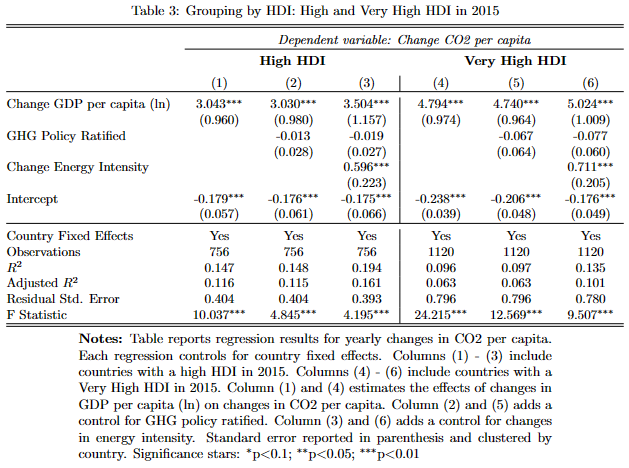

In [22]:
Image(filename='reg_table3.png')

Table 3 estimates the effects of changes in ln GDP per capita, GHG policy ratified, and change in energy intensity on changes in CO2 emissions per capita for countries with a high and very high HDI in 2015. Specifications 1-3 use observations from high HDI countries, and specifications 4-6 use observations from very high HDI countries. 

Table 3 specifications (3) estimates on average, a 1% increase in ln GDP per capita is associated with a 3.505% increase in CO2 per capita for high HDI countries holding GHG policy ratified, and changes in energy intensity constant. The coefficient for GHG policy is not statistically significant and includes 0 in the 95% confidence interval. Specification (3) indicates that a 1 unit increase in energy intensity is associated with a 0.596 metric ton increase in CO2 per capita, holding change in ln GDP per capita and GHG policy constant. The coefficient for change in ln GDP per capita and energy intensity are statistically significant at the 1% level. Specification (3) has an R-square value of .194, which is still low but indicates that some of the changes in CO2 emissions can be explained by the variables included in the regression. Additionally, an f-statistic of 4.195 is highly significant. The coefficient for change in ln GDP per capita is much larger than the Table 2 regressions for low and medium HDI and larger than the estimated effect in Table 1 specification (3). Breaking down the regressions by HDI grouping reveal how much high and very high HDI countries increase the global average for changes in CO2 emissions based on ln GDP per capita. 

Table 3 specifications (6) estimates on average, a 1% increase in ln GDP per capita is associated with a 5.024% increase in CO2 per capita for very high HDI countries holding GHG policy ratified and changes in energy intensity constant. The coefficient for GHG policy is not statistically significant and includes 0 in the 95% confidence interval. Specification (3) indicates that a 1 unit increase in energy intensity is associated with a 0.711 metric ton increase in CO2 per capita, holding change in ln GDP per capita and GHG policy constant. The coefficient for change in ln GDP per capita and energy intensity are statistically significant at the 1% level. Specification (6) has an R-square value of 0.135, which is lower than in high HDI countries, and the f-statistic of 9.507 is highly significant. Very high HDI countries have the largest increases in CO2 per capita associated with an increase in GDP per capita. 

Overall, tables 2 and 3 provide a lot of insight into the relationship between CO2 emissions and each level of economic development. Countries in the low HDI category are estimated to have no significant relationship between ln GDP per capita and CO2 emissions - the R-squared value was near 0. While countries in the medium HDI category have a significant relationship, the association is smaller than the estimated average global effect from Table 1. High and very high HDI countries have estimated associations of 0.8 to 2.7 percentage points higher than the estimated global average. By breaking down the observations by HDI category, it's clear that countries with higher levels of development have higher emissions and a stronger correlation between CO2 per capita and ln GDP per capita. These results align with the EKC hypothesis, low HDI countries have the smallest economies and lack industrialized capital. Medium HDI countries have the industrialized capital indicated by their higher emissions, which also comes with increased GDP per capita. High and very high HDI countries are the most industrialized countries, creating the most CO2 emissions and the largest economic output. Due to data not being available past 2018, it is hard to determine in this dataset if high and very high HDI countries have crossed a threshold to start reducing their emissions. To determine if emissions are declining, a non-linear regression would better estimate the effects. 

Additionally, none of the regressions in Tables 2 and 3 yielded sufficient evidence indicating that GHG reduction targets are an effective tool for reducing CO2 emissions. Even for countries with very high HDI, we fail to find evidence that GHG reduction targets even reduce emissions, with each coefficient having a 95% confidence interval that includes 0. 

While the regressions in Tables 2 and 3 have better results, my preferred specification that includes my entire dataset is Table 1 specification (3). Specification (3) is preferred to include all essential variables, CO2 per capita, ln GDP per capita, GHG policy, energy intensity, and country fixed effects. Specification (4) was not chosen because the HDI categorical variable did not have statistically significant results. 

## Machine Learning


## Conclusion
Using CO2 emissions data combined with various indicators for economic development and classifying countries by different levels of economic development, we revealed that countries with a high CO2 per capita correlates with higher levels of economic development, revealing our dependence on fossil fuels to grow our economies. Countries that consume more fossil fuels and generate higher CO2 emissions have higher levels of economic development. As the effects of climate change continue to worsen, the need to invest in and transition to renewable technology becomes more urgent. The relationship between increases in GDP per capita and CO2 emissions per capita suggest the possibility of an inverted-U shaped EKC curve, with the existence of a threshold level of development that allows for reduction of CO2 emissions without stalling growth. Additionally, I failed to find evidence supporting GHG reduction targets as an effective tool to reduce CO2 emissions.

Future projects

# Citations
## Datasets
- The Global Carbon Project. (1750-2022). *Emissions by Country* (GCB2022v27). (https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022?select=GCB2022v27_percapita_flat.csv).
- The World Bank. (1990-2022). *GDP per capita (2017 international $)*. (https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD)
- United Nations Development Program. (1990-2021). *Human Development Index and components*. (https://hdr.undp.org/data-center/documentation-and-downloads)
- Our World In Data. (1965-2018). *Energy Intensity*. (https://ourworldindata.org/grapher/energy-intensity)
- Climate Policy Database. (1991-2023) *Country Policies with GHG Reduction Target*. (https://climatepolicydatabase.org/policies?decision_date=&high_impact=All&jurisdiction%5B0%5D=893&policy_instrument%5B882%5D=882&keywords=&order=field_policy_date_of_decision&sort=asc)
## Literature  Review
- Antonakakis, N., Chatziantoniou, I., & Filis, G. (2017). Energy consumption, CO2 emissions, and economic growth: An ethical dilemma. _Renewable and Sustainable Energy Reviews_, _68_ (Part 1), 808-824. (https://doi.org/10.1016/j.rser.2016.09.105)

- Bhattacharya, M., Paramati, S. I., Ozturk, I., & Bhattacharya, S. (2016). The effect of renewable energy consumption on economic growth: Evidence from top 38 countries. _Applied Energy_, _162_ (January), 733-741. https://doi.org/10.1016/J.APENERGY.2015.10.104

- Chiu, C. L., & Change, T. H. (2009). What proportion of renewable energy supplies is needed to initially mitigate CO2 emissions in OECD member countries? _Renewable and Sustainable Energy Reviews_, _13_(6-7), 1669-1674. https://doi.org/10.1016/j.rser.2008.09.026

- Jaforullah, M., & King, A. (2015). Does the use of renewable energy sources mitigate CO2 emissions? A reassessment of the US evidence. _Energy Economics_, _49_, 711-717. https://doi.org/10.1016/j.eneco.2015.04.006

- Marques, A. C., & Fuinhas, J. A. (2012). Is renewable energy effective in promoting growth? _Energy Policy_, _46_ (July), 434-442. https://doi.org/10.1016/j.enpol.2012.04.006

- Selden, T. M., & Song, D. (1994). Environmental Quality and Devlopment: Is There a Kuznets Curve for Air Pollution Emissions? _Journal of Environmental Economics and Management_, _27_(2), 147-162. https://doi.org/10.1006/jeem.1994.1031

- Singh, N., Nyuur, R., & Richmond, B. (2019). Renewable Energy Development as a Driver of Economic Growth: Evidence from Multivariate Panel Data Analysis. _Sustainability_, _11_ (8). https://doi.org/10.3390/su11082418
